In [1]:
# Install this module whenever libnirs isn't 
# %pip install --user -U git+https://github.com/jdtatz/libnirs.git

In [2]:
#%pip install --upgrade nbformat

In [3]:
import numpy as np
from libnirs import *
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from matplotlib import colors
from matplotlib import rc
from matplotlib import rcParams
from decimal import Decimal

latex_path = '/usr/local/texlive/2023/bin/universal-darwin'

rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}\usepackage{{amsfonts}}\usepackage{{amssymb}}'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['mathtext.fontset'] = 'cm'


In [4]:
#Run this just on local 
%env PATH=/Library/TeX/texbin:$PATH

env: PATH=/Library/TeX/texbin:$PATH


In [7]:
file_names = ['Only_LRF_IVH','Only_LRF_Preterm']
keys=['IVH','PBI']

In [8]:
wavelengths = ['673','686','701','724','754','784','814','827','852']
population_dataframes_dict={}
for name, key in zip(file_names, keys): 
    population_dataframes_dict[key] = pd.read_excel(name+'.xlsx')
    organized_df = pd.DataFrame()
    
    for w in wavelengths: 
        try: 
            organized_df['µsp_'+w] = population_dataframes_dict[key]['musp'+w]
        except:
            organized_df['µsp_'+w] = population_dataframes_dict[key]['ms_'+w]

        try: 
            organized_df['µa_'+w] = population_dataframes_dict[key]['mua'+w]
        except:
            organized_df['µa_'+w] = population_dataframes_dict[key]['ma_'+w]
                
        try: 
            organized_df['µsp_'+w] = population_dataframes_dict[key]['musp'+w]
        except:
            organized_df['µsp_'+w] = population_dataframes_dict[key]['ms_'+w]
        try: 
            organized_df['µa_'+w] = population_dataframes_dict[key]['mua'+w]
        except:
            organized_df['µa_'+w] = population_dataframes_dict[key]['ma_'+w]
    
    #organized_df = organized_df.dropna()
    
    population_dataframes_dict[key] = organized_df

In [9]:

def create_dictionary_µs_d(dictionary_of_data_frames,wvls, distances, return_min_and_max_µ):
    original_wvls = wvls.copy()
    n= 1.4; n_ext = 1;
    stat_dict_µs={}; stat_dict_dr ={}; stat_dict_dr_v = {}; µus_dict = {}; diff_ref_dict ={}; min_value_µa = 10000; min_value_µsp = 1000; 
    max_value_µa = 0; max_value_µsp = 0; 
    min_value_dr =1000; max_value_dr = 0;
    wavelength_included = True

    for key in list(dictionary_of_data_frames.keys()):
        wvls = original_wvls.copy()
        µsp_dict = {}; µa_dict = {}; µ_categories={}; µsp_stat_dict = {}; µa_stat_dict={};  stat_categories={}; dr_distance_dict = {}; 
        dr_distance_stats ={};dr_distance_stats_v={};

        for d in distances: 
            dif_ref_wl_dict = {}; dr_wl_stats = {}; dr_wl_stats_v = {};
            for w in wvls:
                dif_ref = []
                dif_ref_stat_array_v = []; dif_ref_stat_array = []; µsp_stat_array = []; µa_stat_array=[]; 
                try:
                    µsp_dict[w] = np.asarray(dictionary_of_data_frames[key]['µsp_'+w].dropna())
                    µa_dict[w] = np.asarray(dictionary_of_data_frames[key]['µa_'+w].dropna())    

            
                    for µ_a, µ_sp in zip(µa_dict[w], µsp_dict[w]):
                        dr = model_ss(d, µ_a, µ_sp, n, n_ext)
                        #if np.round(dr/(2*np.pi),5) > 0.0003 and w == '673':
                         #   print(key)
                          #  print(w)
                           # print(µ_a)
                            #print(µ_sp)
                           # print('')
                            #print('')
                        dif_ref = np.append(dif_ref,(dr/(2*np.pi)))                       


                    

                    dif_ref_wl_dict[w] = dif_ref
                    diff_ref_min_v = min(dif_ref_wl_dict[w])
                    diff_ref_min =  '%.2E' % Decimal (min(dif_ref_wl_dict[w])); diff_ref_min = diff_ref_min[0:4] + ' E-'+diff_ref_min[-1]
                    dif_ref_stat_array_v = np.append(dif_ref_stat_array_v,diff_ref_min_v)
                    dif_ref_stat_array = np.append(dif_ref_stat_array, diff_ref_min)
                    
                   
                    diff_ref_1_p_v = np.percentile(dif_ref_wl_dict[w],1)
                    dif_ref_stat_array_v = np.append(dif_ref_stat_array_v,diff_ref_1_p_v)

                    diff_ref_1_p =  '%.2E' % Decimal (np.percentile(dif_ref_wl_dict[w],1)); diff_ref_1_p = diff_ref_1_p[0:4] + ' E-'+diff_ref_1_p[-1]
                    dif_ref_stat_array = np.append(dif_ref_stat_array, diff_ref_1_p)

                    diff_ref_5_p_v = np.percentile(dif_ref_wl_dict[w],5)
                    dif_ref_stat_array_v = np.append(dif_ref_stat_array_v,diff_ref_5_p_v)

                    diff_ref_5_p =  '%.2E' % Decimal (np.percentile(dif_ref_wl_dict[w],5)); diff_ref_5_p = diff_ref_5_p[0:4] + ' E-'+diff_ref_5_p[-1]
                    dif_ref_stat_array = np.append(dif_ref_stat_array, diff_ref_5_p)

                    diff_ref_95_p_v = np.percentile(dif_ref_wl_dict[w],95)
                    dif_ref_stat_array_v = np.append(dif_ref_stat_array_v,diff_ref_95_p_v)

                    diff_ref_95_p =  '%.2E' % Decimal (np.percentile(dif_ref_wl_dict[w],95)); diff_ref_95_p = diff_ref_95_p[0:4] + ' E-'+diff_ref_95_p[-1]
                    dif_ref_stat_array = np.append(dif_ref_stat_array, diff_ref_95_p)
                    
                    diff_ref_99_p_v = np.percentile(dif_ref_wl_dict[w],99)
                    dif_ref_stat_array_v = np.append(dif_ref_stat_array_v,diff_ref_99_p_v)

                    diff_ref_99_p =  '%.2E' % Decimal (np.percentile(dif_ref_wl_dict[w],99)); diff_ref_99_p = diff_ref_99_p[0:4] + ' E-'+diff_ref_99_p[-1]
                    dif_ref_stat_array = np.append(dif_ref_stat_array, diff_ref_99_p)
                    
                    diff_ref_max_v = max(dif_ref_wl_dict[w])
                    dif_ref_stat_array_v = np.append(dif_ref_stat_array_v, diff_ref_max_v)

                    diff_ref_max =  '%.2E' % Decimal (max(dif_ref_wl_dict[w])); diff_ref_max = diff_ref_max[0:4] + ' E-'+diff_ref_max[-1]
                    dif_ref_stat_array = np.append(dif_ref_stat_array, diff_ref_max)


                    dr_wl_stats[w] = dif_ref_stat_array
                    dr_wl_stats_v[w] = dif_ref_stat_array_v

                    if min(dif_ref_wl_dict[w]) < min_value_dr:
                        min_value_dr = min(dif_ref_wl_dict[w])
                    if max(dif_ref_wl_dict[w]) > max_value_dr:
                        max_value_dr = max(dif_ref_wl_dict[w])


                    if d == distances[0]:
                        µsp_stat_array =  np.append(µsp_stat_array,min(µsp_dict[w])); µsp_stat_array =  np.append(µsp_stat_array,max(µsp_dict[w]))
                        µsp_stat_array =  np.append(µsp_stat_array,np.percentile(µsp_dict[w], 95)); µsp_stat_array =  np.append(µsp_stat_array,np.percentile(µsp_dict[w], 99))
                        µsp_stat_dict[w] = µsp_stat_array
                        
                        µa_stat_array =  np.append(µa_stat_array,min(µa_dict[w])); µa_stat_array =  np.append(µa_stat_array,max(µa_dict[w]))
                        µa_stat_array =  np.append(µa_stat_array, np.percentile(µa_dict[w], 95)); µa_stat_array =  np.append(µa_stat_array,np.percentile(µa_dict[w], 99))
                        µa_stat_dict[w] = µa_stat_array


                        if max(µsp_dict[w]) > max_value_µsp: 
                            max_value_µsp = max(µsp_dict[w])
                        if max(µa_dict[w]) > max_value_µa: 
                            max_value_µa = max(µa_dict[w])

                        if min(µsp_dict[w]) < min_value_µsp: 
                            min_value_µsp = min(µsp_dict[w])
                        if min(µa_dict[w]) < min_value_µa: 
                            min_value_µa = min(µa_dict[w])
                except:
                    wavelength_included = False
                    wavelength_not_included = w

            dr_distance_dict[str(d)+'_cm'] = dif_ref_wl_dict
            dr_distance_stats[str(d)+'_cm'] = dr_wl_stats
            dr_distance_stats_v[str(d)+'_cm'] = dr_wl_stats_v

        if not wavelength_included:
            print('The wavelength: ' + wavelength_not_included + ' is not in the ' +key+ ' population dataset' )

        wavelength_included = True

        diff_ref_dict[key] = dr_distance_dict
        stat_dict_dr[key] = dr_distance_stats
        stat_dict_dr_v[key] = dr_distance_stats_v
        stat_categories['µsp_stats'] = µsp_stat_dict; stat_categories['µa_stats'] = µa_stat_dict
        µ_categories['µsp_dict']= µsp_dict ; µ_categories['µa_dict']= µa_dict 
        µus_dict[key] =  µ_categories
        stat_dict_µs[key] =  stat_categories
    min_values_µs = np.asarray([min_value_µa, min_value_µsp])
    max_values_µs = np.asarray([max_value_µa, max_value_µsp])

    #stat_dict returns the values of min, 1, 5, 95, 99, and max  in that order
    if return_min_and_max_µ: 
        return µus_dict, diff_ref_dict, stat_dict_dr, stat_dict_dr_v, min_value_dr, max_value_dr, min_values_µs, max_values_µs, stat_dict_µs
        
    else: 
        return µus_dict, diff_ref_dict, stat_dict_dr,stat_dict_dr_v, min_value_dr, max_value_dr

    


In [10]:
µs_values_dict_d, diff_ref_dict_d, stat_dict_dr_d, stat_dict_dr_d_v, min_value_dr_d, max_value_dr_d  = create_dictionary_µs_d(population_dataframes_dict,wavelengths,[3],False)

In [11]:
dr_df = pd.DataFrame(columns=['Population','Distance (cm)', 'Wavelength (nm)', 'Min_DR (per Str)', 'Max_DR (per Str)', 
                              '1 %ile (DR per Str)', '5 %ile (DR per Str)', '95 %ile (DR per Str)', '99 %ile (DR per Str)'])

for population in stat_dict_dr_d.keys(): 
    for distance in stat_dict_dr_d[population].keys():
        for wavelength in stat_dict_dr_d[population][distance].keys():
            stat_values = stat_dict_dr_d[population][distance][wavelength]
            dr_df.loc[len(dr_df.index)] = [population, distance, wavelength,stat_values[0],stat_values[1],stat_values[2],stat_values[3],stat_values[4],stat_values[5]] 

dr_df
dr_df.to_csv('Min_Max_Percentiles_DR')

# CCHU File

In [13]:
# Read file and drop non µ columns

xlsx_file = pd.ExcelFile('CCHU_Optics_analysis_230817.xlsx')
stage = ['pre', 'post', '1 mo', '6 mo', '12 mo']
dataframe_dict_CCHU = {}
for s in stage: 
    dataframe_dict_CCHU[s] = pd.read_excel(xlsx_file, s)
    cols = dataframe_dict_CCHU[s].columns
    for col in cols:
        if ('musp'  in col) or ('mua' in col) or ('studyID' in col):
            pass
        else:
            dataframe_dict_CCHU[s] = dataframe_dict_CCHU[s].drop([col],axis=1)
    

In [14]:
available_positions = ['F3','F4', 'F7', 'F8', 'T7', 'T8', 'DLPF', 'VLPF', 'PF', 'T', 'A']

In [15]:
#How to select values: First which baby stage, then which positions

In [16]:

available_positions = ['F3','F4', 'F7', 'F8', 'T7', 'T8', 'DLPF', 'VLPF', 'PF', 'T', 'A']
baby_stages = ['pre','post', '1 mo', '6 mo', '12 mo']
cchu_wavelengths = ['673', '686', '701', '724', '754', '784', '814', '827']
chosen_positions = ['F3','F4', 'F7', 'F8', 'T7', 'T8', 'DLPF', 'VLPF', 'PF', 'T', 'A']
resulting_data_frame = pd.DataFrame()
µ_dict_cchu = {}
µ_dict_cchu_combined = {}; µsp_array_cchu_combined=[]; µsp_array_cchu_combined =[];

for we in cchu_wavelengths:
    µ_dict_cchu_combined['µsp_'+we] = []
    µ_dict_cchu_combined['µa_'+we] = []


#First for looks into the dictionary of dataframes which is sorted by baby stage
combined_µa_array = []; combined_µsp_array = []
for bs in baby_stages: 
    µ_dict_cchu[bs] = {}
    combined_µa_array = []; combined_µsp_array = []

    #print(bs)
    #Second for goes over the chosen positions array 

    wl_dict = {}
    for wl in cchu_wavelengths: 
        wl_array_µsp = []; wl_array_µa = []
        for pos in chosen_positions:
            for column in dataframe_dict_CCHU[bs].columns:
                if (wl in column) and (pos in column):
                    if pos == 'T': 
                        if ('T7' in column) or ('T8' in column): 
                            add = False
                        else: add = True
                    else: add = True

                    if add: 
                        if 'musp' in column:
                            wl_array_µsp = np.append(wl_array_µsp, dataframe_dict_CCHU[bs][column])  
                        else: wl_array_µa = np.append(wl_array_µa, dataframe_dict_CCHU[bs][column])  


        µsp_array_cchu_combined = µ_dict_cchu_combined['µsp_'+wl]
        µsp_array_cchu_combined = np.append(µsp_array_cchu_combined,wl_array_µsp)
        µ_dict_cchu_combined['µsp_'+wl] = µsp_array_cchu_combined
        
        µa_array_cchu_combined = µ_dict_cchu_combined['µa_'+wl]
        µa_array_cchu_combined = np.append(µa_array_cchu_combined,wl_array_µa)
        µ_dict_cchu_combined['µa_'+wl] = µa_array_cchu_combined


        wl_dict['µsp_'+wl] = wl_array_µsp
        wl_dict['µa_'+wl] = wl_array_µa


                    
    µ_dict_cchu[bs] = wl_dict

µ_dict_cchu['total'] = µ_dict_cchu_combined
              
                    

In [17]:
#Putting the information of dictionaries of baby stages into dataframes
cchu_dataframes_bby_stage = {}
for bby_stage in µ_dict_cchu.keys(): 
    cchu_dataframes_bby_stage[bby_stage] = pd.DataFrame()
    
    for w in cchu_wavelengths:         
            cchu_dataframes_bby_stage[bby_stage]['µsp_'+w] = µ_dict_cchu[bby_stage]['µsp_'+w]
            cchu_dataframes_bby_stage[bby_stage]['µa_'+w] = µ_dict_cchu[bby_stage]['µa_'+w]

# Putting all dataframes under one same dictionary

In [18]:
final_dict_all_populations = {}

for cchu_population in cchu_dataframes_bby_stage.keys(): 
    final_dict_all_populations[cchu_population] = cchu_dataframes_bby_stage[cchu_population]
for population_of_previous_files in population_dataframes_dict.keys():
    final_dict_all_populations[population_of_previous_files] = population_dataframes_dict[population_of_previous_files]

In [19]:
µs_values_dict_f, diff_ref_dict_f, stat_dict_dr_f,stat_dict_dr_f_v, min_value_dr_f, max_value_dr_f  = create_dictionary_µs_d(final_dict_all_populations,wavelengths,[3],False)

The wavelength: 852 is not in the pre population dataset
The wavelength: 852 is not in the post population dataset
The wavelength: 852 is not in the 1 mo population dataset
The wavelength: 852 is not in the 6 mo population dataset
The wavelength: 852 is not in the 12 mo population dataset
The wavelength: 852 is not in the total population dataset


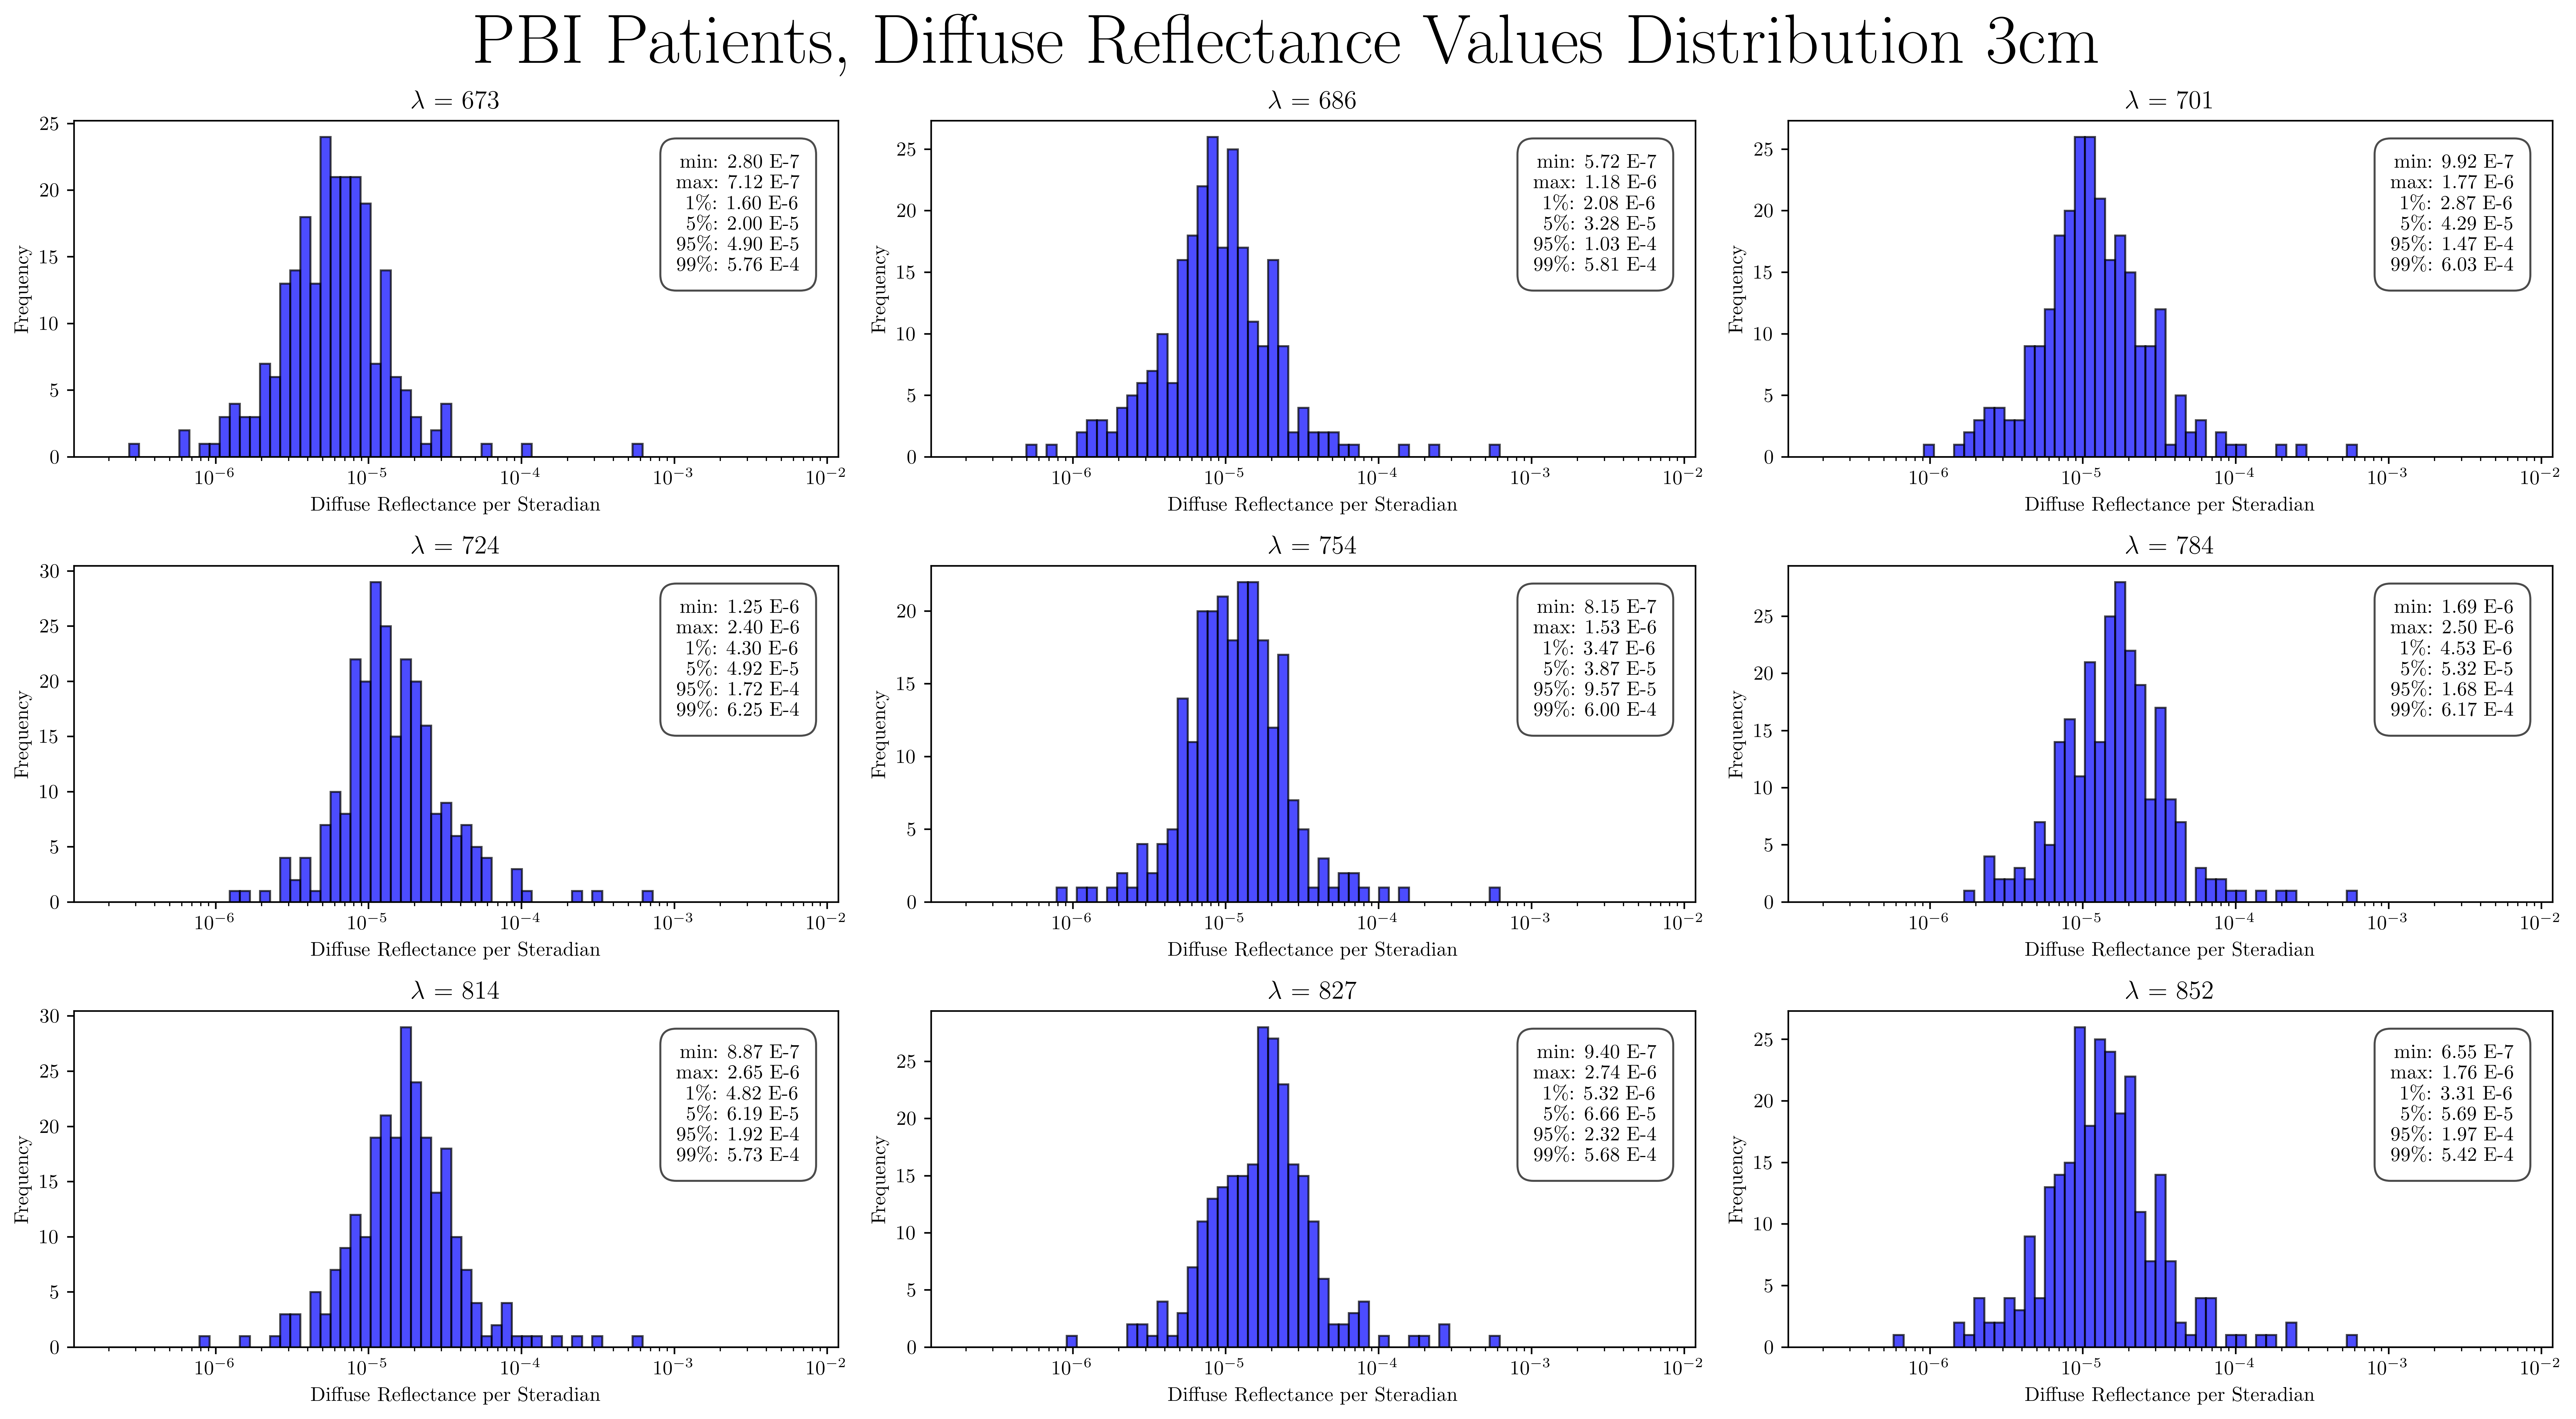

In [20]:

patients = 'PBI'
distance = '3_cm'
dr_dict_p = diff_ref_dict_d[patients][distance]
stat_dict_dr_p = stat_dict_dr_d[patients][distance]
log_bins = np.logspace(np.log10(0.0000002), np.log10(0.007), 70)

fig, axs = plt.subplots(3, 3, figsize=(18, 10), dpi=500)
axs = axs.flatten()

for wv in range(len(wavelengths)):
    stat_array = stat_dict_dr_p[wavelengths[wv]]
    axs[wv].hist(dr_dict_p[wavelengths[wv]], bins=log_bins, color='blue', edgecolor='black', alpha=0.7)
    axs[wv].set_xlabel(fr'Diffuse Reflectance per Steradian')
    axs[wv].set_xscale('log')
    axs[wv].set_ylabel(r"Frequency")
    axs[wv].set_title(fr"$\lambda$ =  {wavelengths[wv]}",fontsize = 13)

    # Add personalized text in the upper right corner
    # Add personalized text in the upper right corner
    # Add personalized text in the upper right corner
    text = f"min: {stat_array[0]}\nmax: {stat_array[1]}\n1\%: {stat_array[2]}\n5\%: {stat_array[3]}\n95\%: {stat_array[4]}\n99\%: {stat_array[5]}"
    axs[wv].text(0.95, 0.9, text, transform=axs[wv].transAxes, fontsize=10,
                verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.8'))




fig.suptitle(fr"{patients} Patients, Diffuse Reflectance Values Distribution " + distance[0]+ "cm", fontsize=35, fontweight='bold')

plt.tight_layout()
plt.savefig('Diffuse_Reflectance_Histogram_'+str(patients)+'.jpg', dpi=500)
# plt.show()


In [21]:
# Making a dictionary of the stats of all populations and wavelengths
final_wl_plot_dict = {}
for cchu_wavl in cchu_wavelengths: 
    min_values = []; one_p_values=[]; f_p_values = []; nf_p_values =[]; nn_p_values = []; max_values=[]; wl_dict_plot = {} 
    for popltns in final_dict_all_populations.keys(): 
        min_values = np.append(min_values,stat_dict_dr_f_v[popltns]['3_cm'][cchu_wavl][0])
        one_p_values = np.append(one_p_values,stat_dict_dr_f_v[popltns]['3_cm'][cchu_wavl][1])
        f_p_values = np.append(f_p_values,stat_dict_dr_f_v[popltns]['3_cm'][cchu_wavl][2])
        nf_p_values = np.append(nf_p_values,stat_dict_dr_f_v[popltns]['3_cm'][cchu_wavl][3])
        nn_p_values = np.append(nn_p_values,stat_dict_dr_f_v[popltns]['3_cm'][cchu_wavl][4])
        max_values = np.append(max_values,stat_dict_dr_f_v[popltns]['3_cm'][cchu_wavl][5])
    
    wl_dict_plot['Min'] = min_values; wl_dict_plot['1%'] = one_p_values; wl_dict_plot['5%'] = f_p_values; 
    wl_dict_plot['95%'] = nf_p_values; wl_dict_plot['99%'] = nn_p_values; wl_dict_plot['Max'] = max_values
    final_wl_plot_dict[cchu_wavl] = wl_dict_plot


In [22]:
# Making a dictionary of the stats of all populations and wavelengths, one dictionary with the actual values and the other in string type
final_wl_plot_dict = {}; 
dictionaries_of_stats = [stat_dict_dr_f_v,stat_dict_dr_f]
for i in range (0,2):
    wl_plot_dict={}
    for cchu_wavl in cchu_wavelengths: 
        min_values = []; one_p_values=[]; one_p_values_c = []; f_p_values = []; f_p_values_c = []; 
        nf_p_values =[];  nn_p_values = []; max_values=[]; max_values_c=[]; temporal_wl_dict_plot = {}; 

        for popltns in final_dict_all_populations.keys(): 
            min_values = np.append(min_values,dictionaries_of_stats[i][popltns]['3_cm'][cchu_wavl][0])
            one_p_values = np.append(one_p_values,dictionaries_of_stats[i][popltns]['3_cm'][cchu_wavl][1])
            f_p_values = np.append(f_p_values,dictionaries_of_stats[i][popltns]['3_cm'][cchu_wavl][2])
            nf_p_values = np.append(nf_p_values,dictionaries_of_stats[i][popltns]['3_cm'][cchu_wavl][3])
            nn_p_values = np.append(nn_p_values,dictionaries_of_stats[i][popltns]['3_cm'][cchu_wavl][4])
            max_values = np.append(max_values,dictionaries_of_stats[i][popltns]['3_cm'][cchu_wavl][5])
        
        temporal_wl_dict_plot['Min'] = min_values; temporal_wl_dict_plot['1%'] = one_p_values; temporal_wl_dict_plot['5%'] = f_p_values; 
        temporal_wl_dict_plot['95%'] = nf_p_values; temporal_wl_dict_plot['99%'] = nn_p_values; temporal_wl_dict_plot['Max'] = max_values
        wl_plot_dict[cchu_wavl] = temporal_wl_dict_plot
    if i ==0:
        final_wl_plot_dict['values'] = wl_plot_dict
    else: final_wl_plot_dict['format_string'] = wl_plot_dict
    

In [23]:
#Putting the dictionaries in dataframes
stats_df_dict_by_w_v = {}
stats_df_dict_by_w_s = {}
stat_categories = ['Max', '99%', '95%', '5%', '1%', 'Min']

for wav_cchu in cchu_wavelengths:
    data_df_v = np.empty((0,8))
    data_df_s = np.empty((0,8))

    for sg in stat_categories:
        data_df_v = np.append(data_df_v, [final_wl_plot_dict['values'][wav_cchu][sg]], axis = 0)
        data_df_s = np.append(data_df_s, [final_wl_plot_dict['format_string'][wav_cchu][sg]], axis = 0)
    stats_df_dict_by_w_s[wav_cchu] = pd.DataFrame(data_df_s, columns=list(final_dict_all_populations.keys()),index = stat_categories)
    stats_df_dict_by_w_v[wav_cchu] = pd.DataFrame(data_df_v, columns=list(final_dict_all_populations.keys()),index = stat_categories)


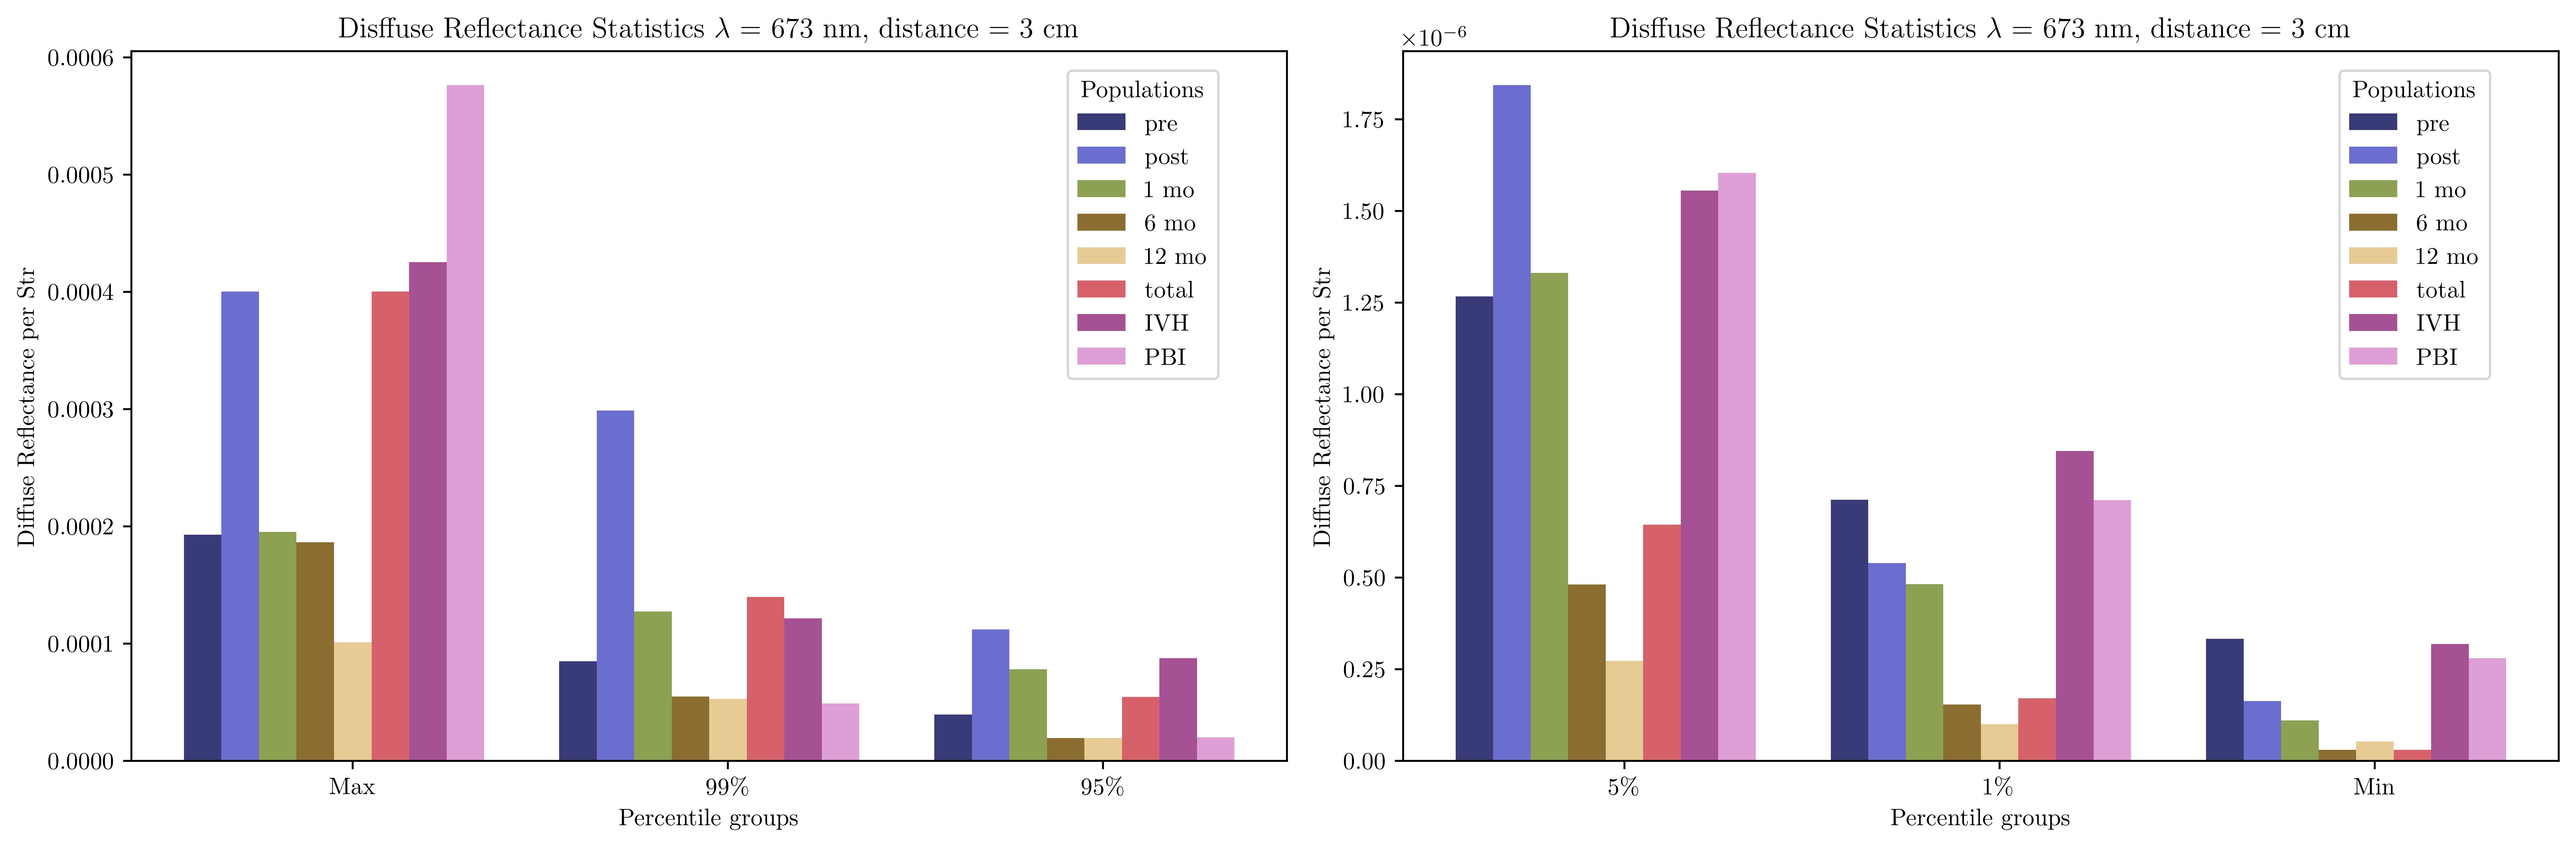

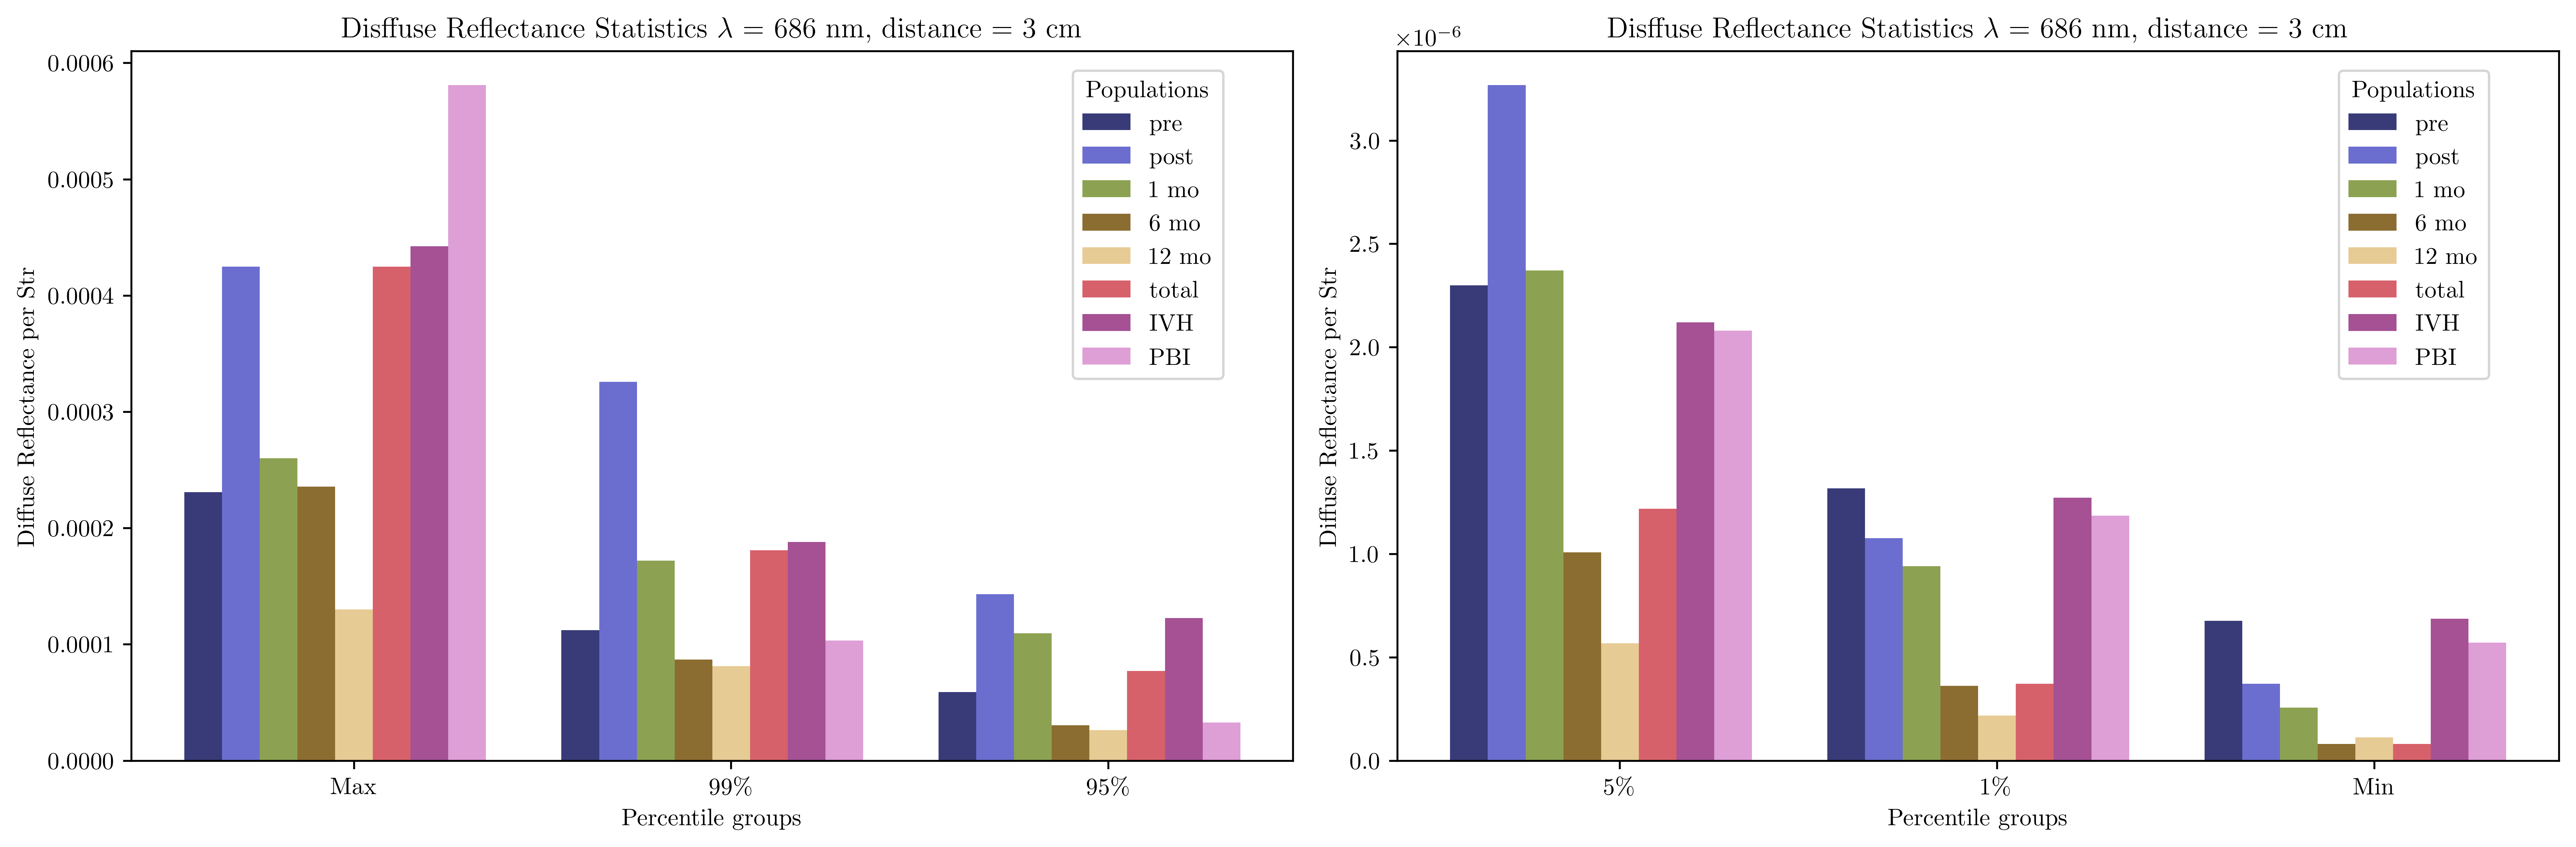

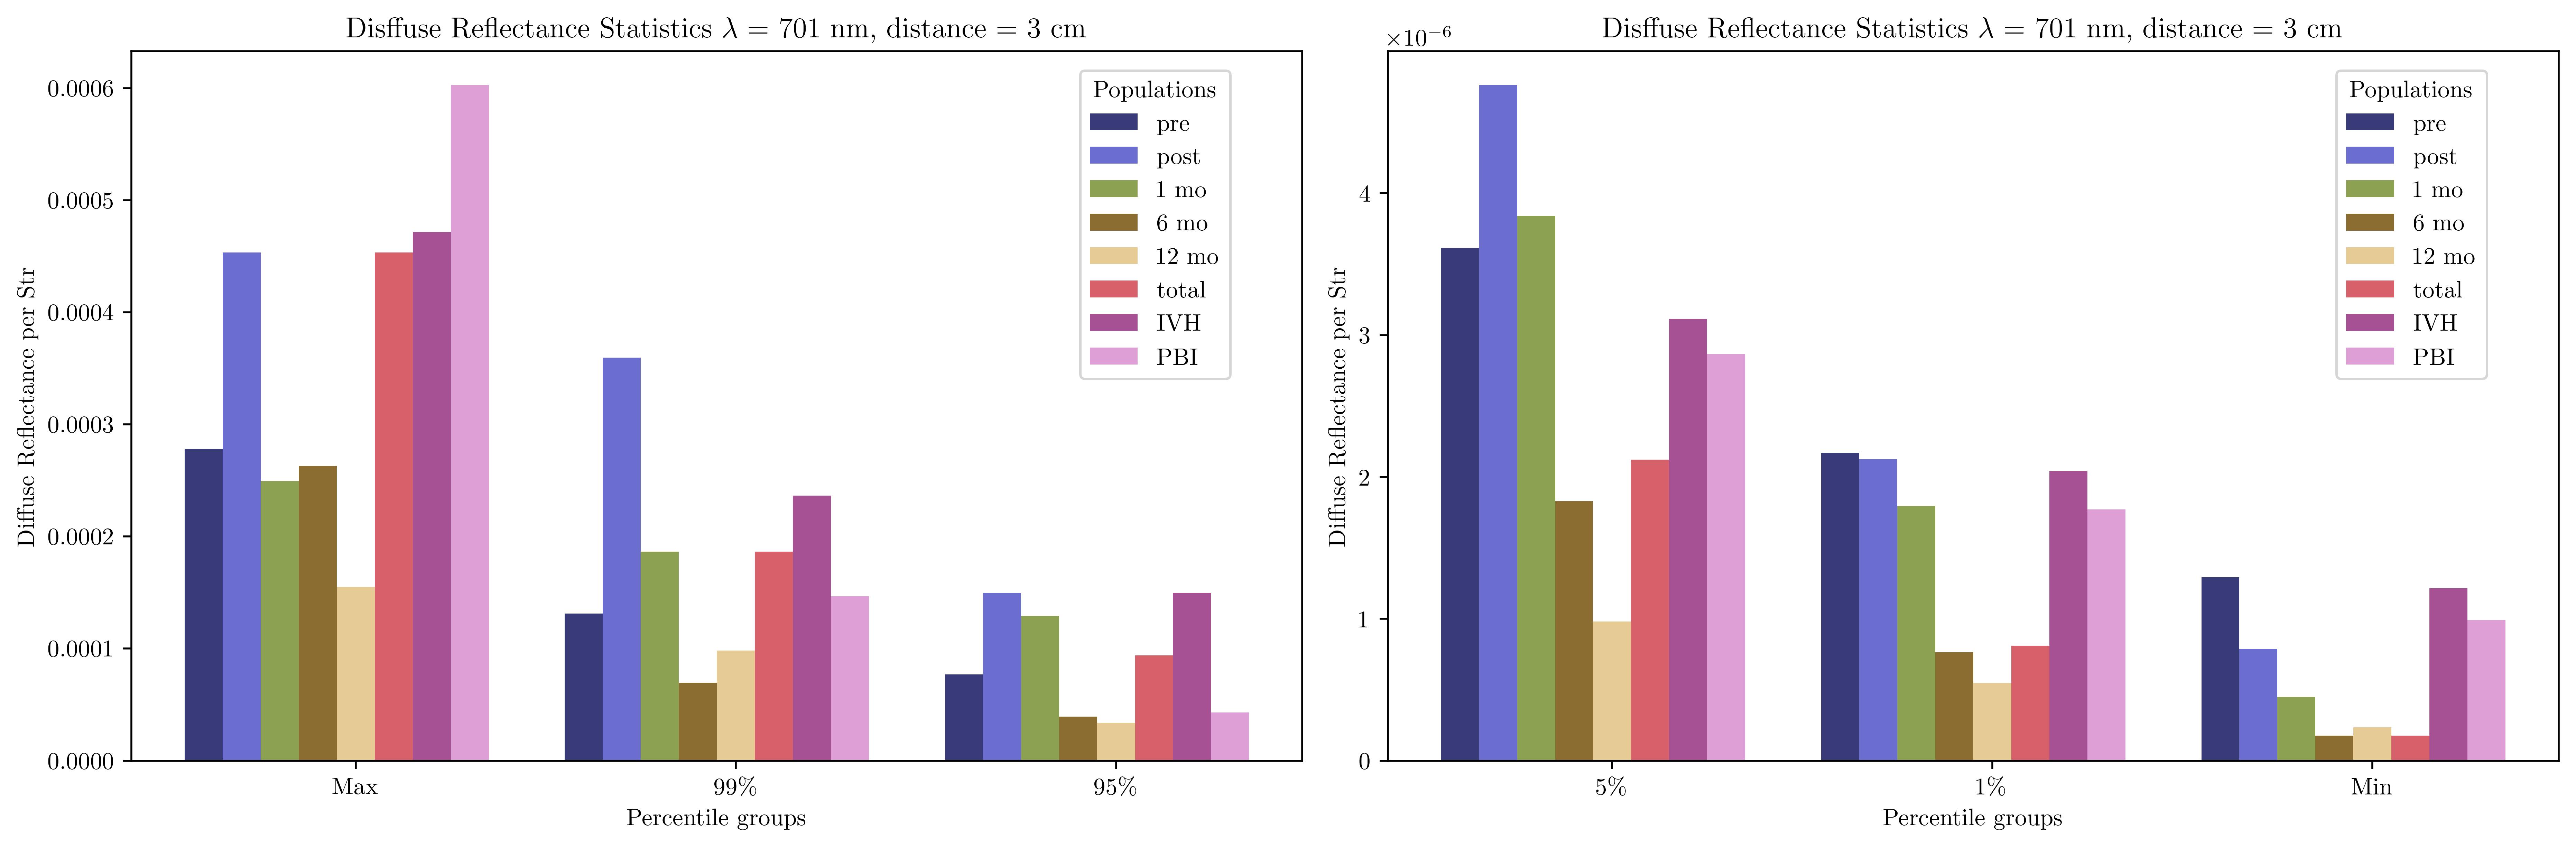

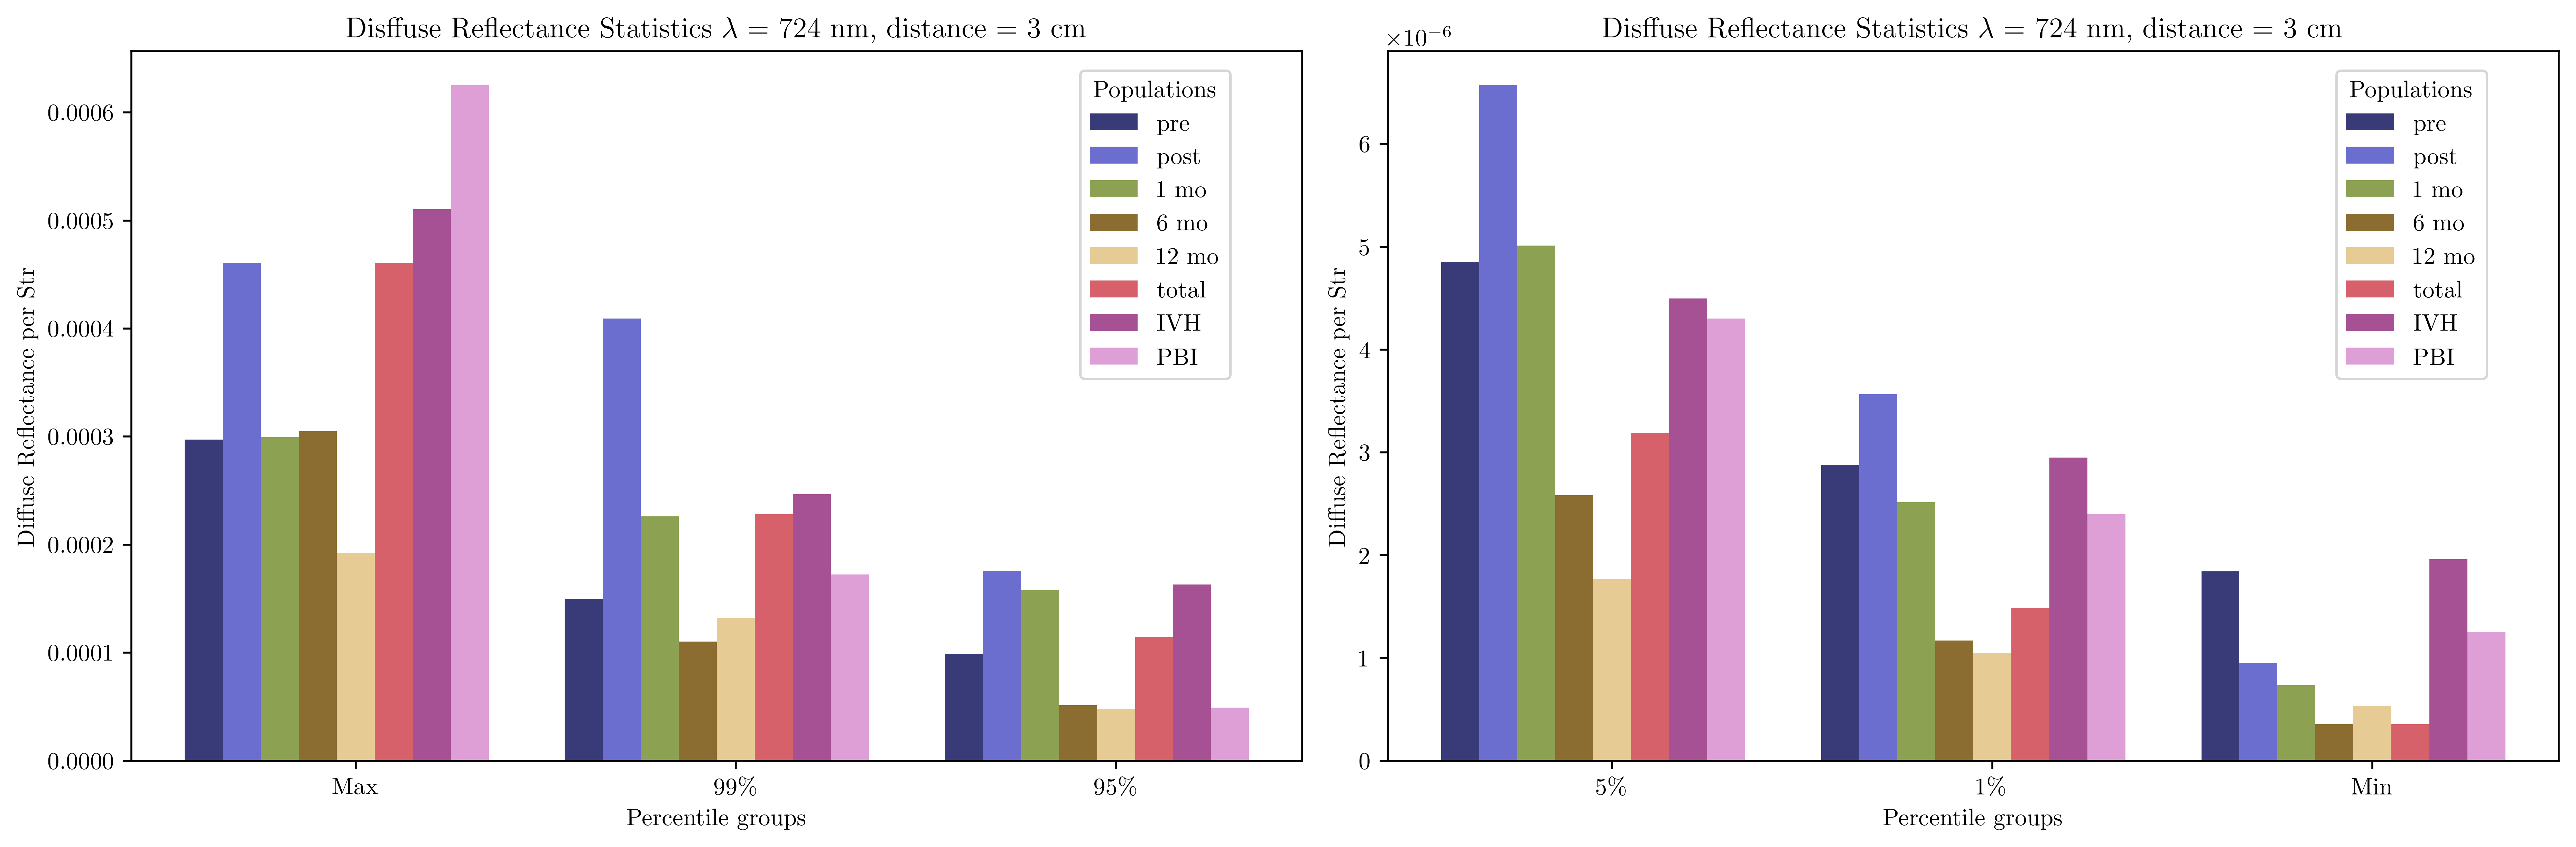

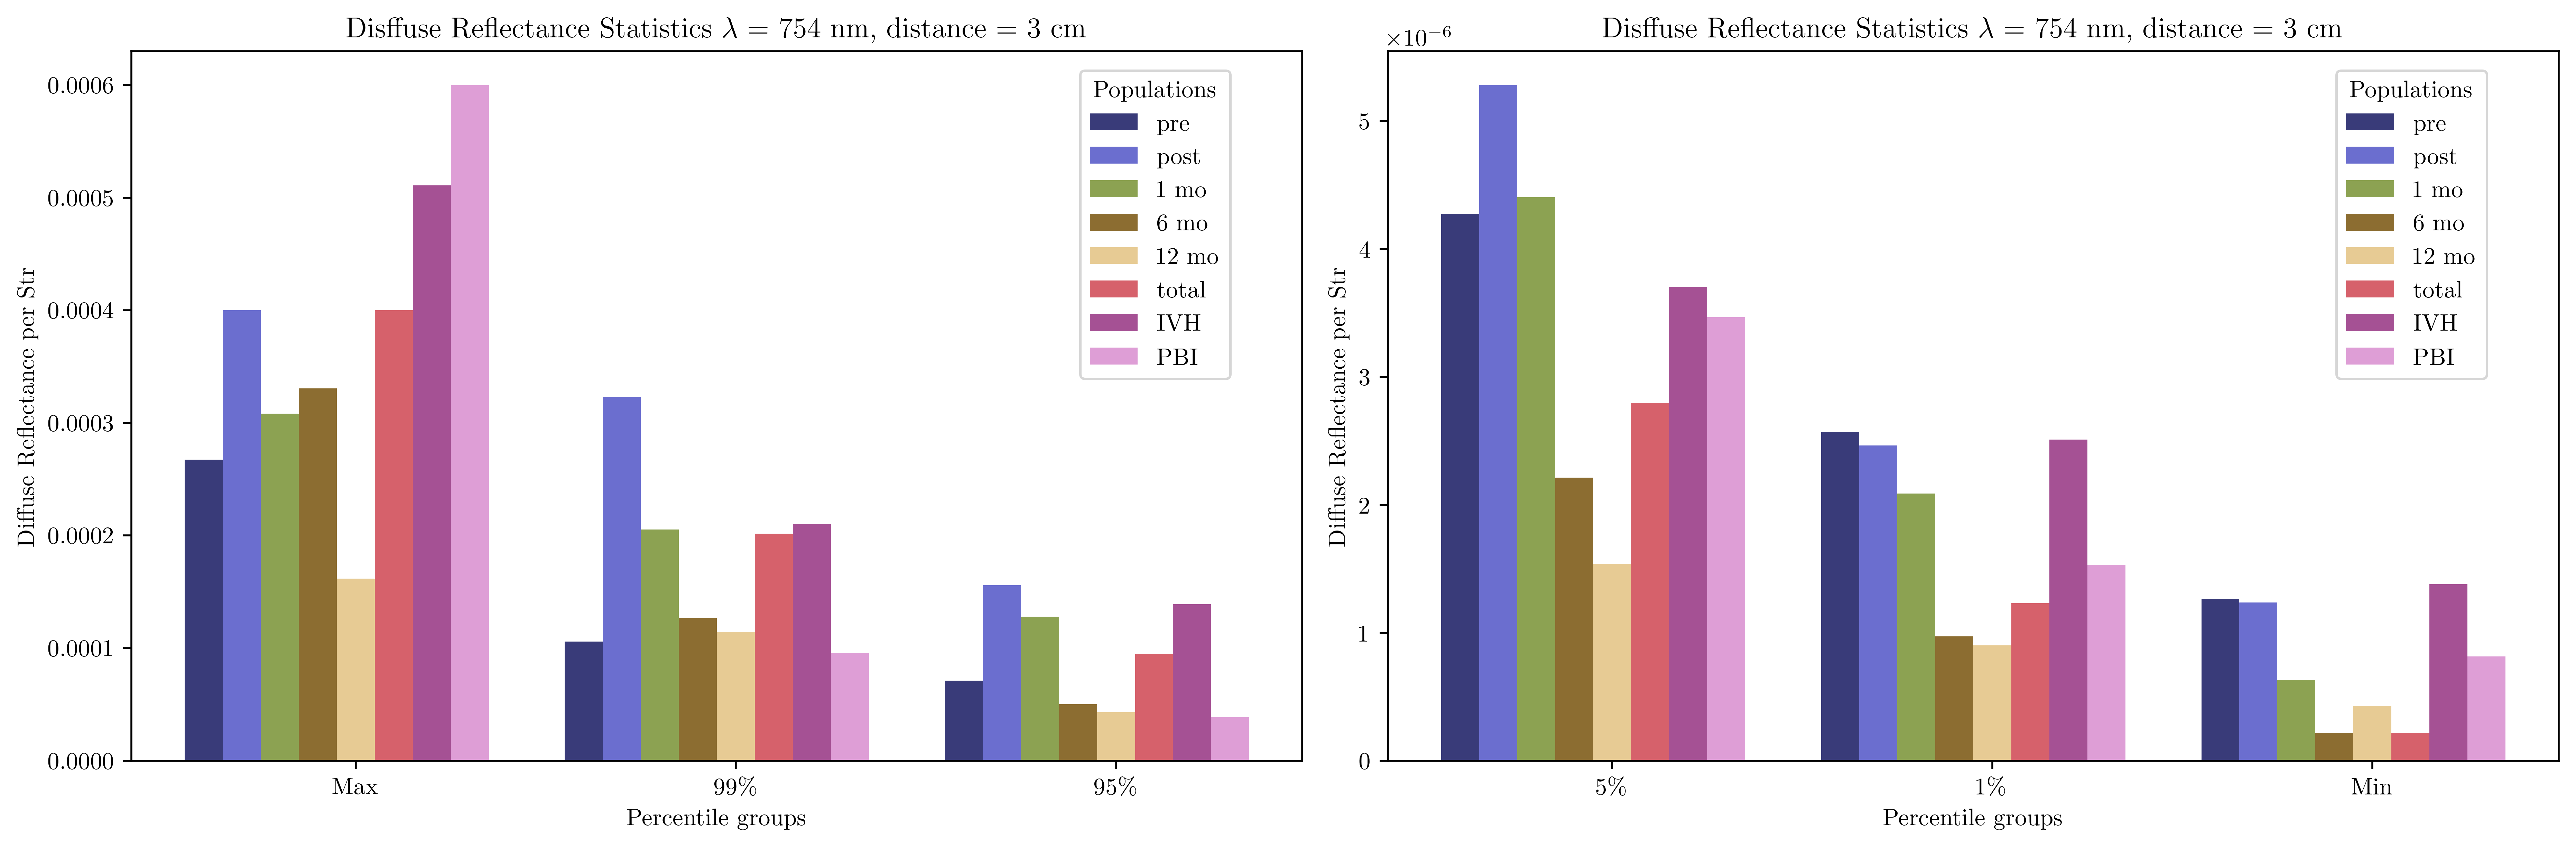

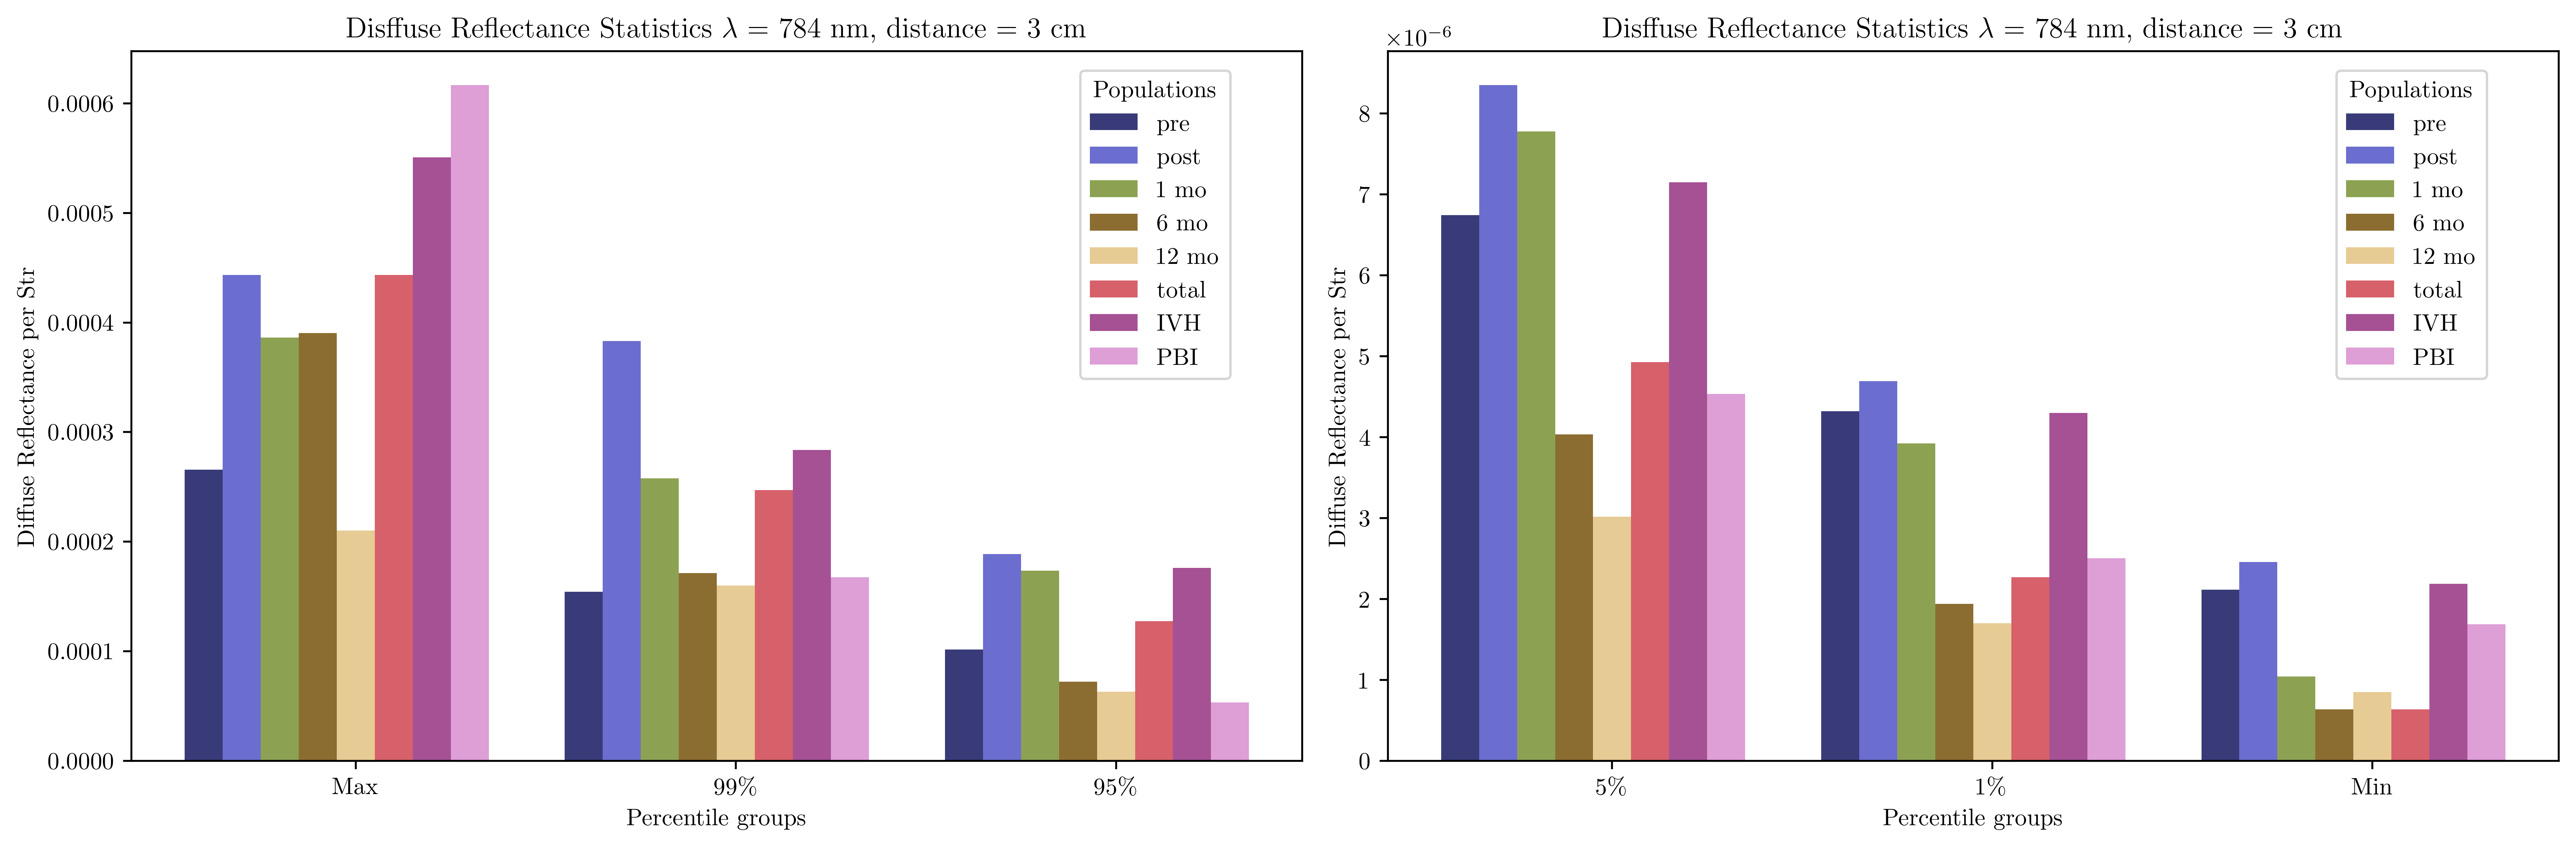

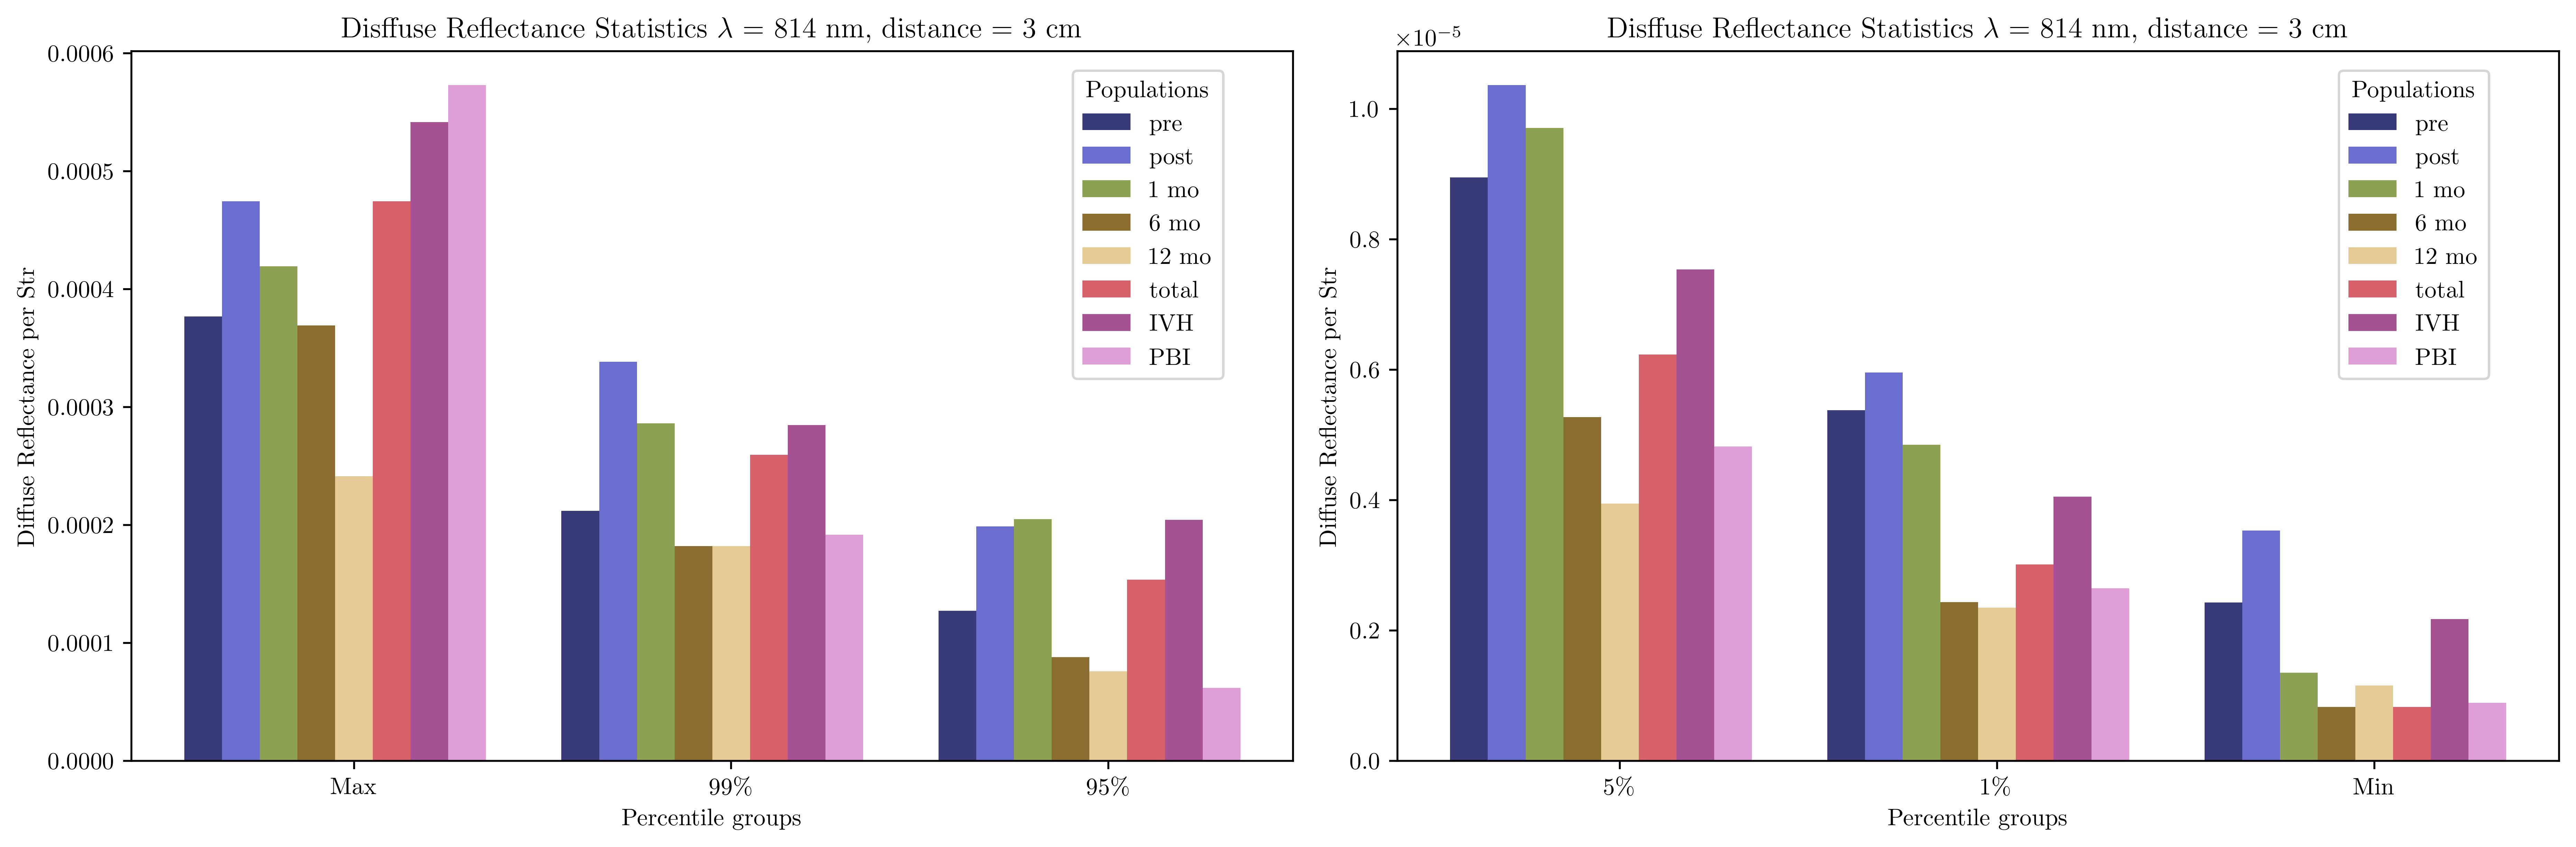

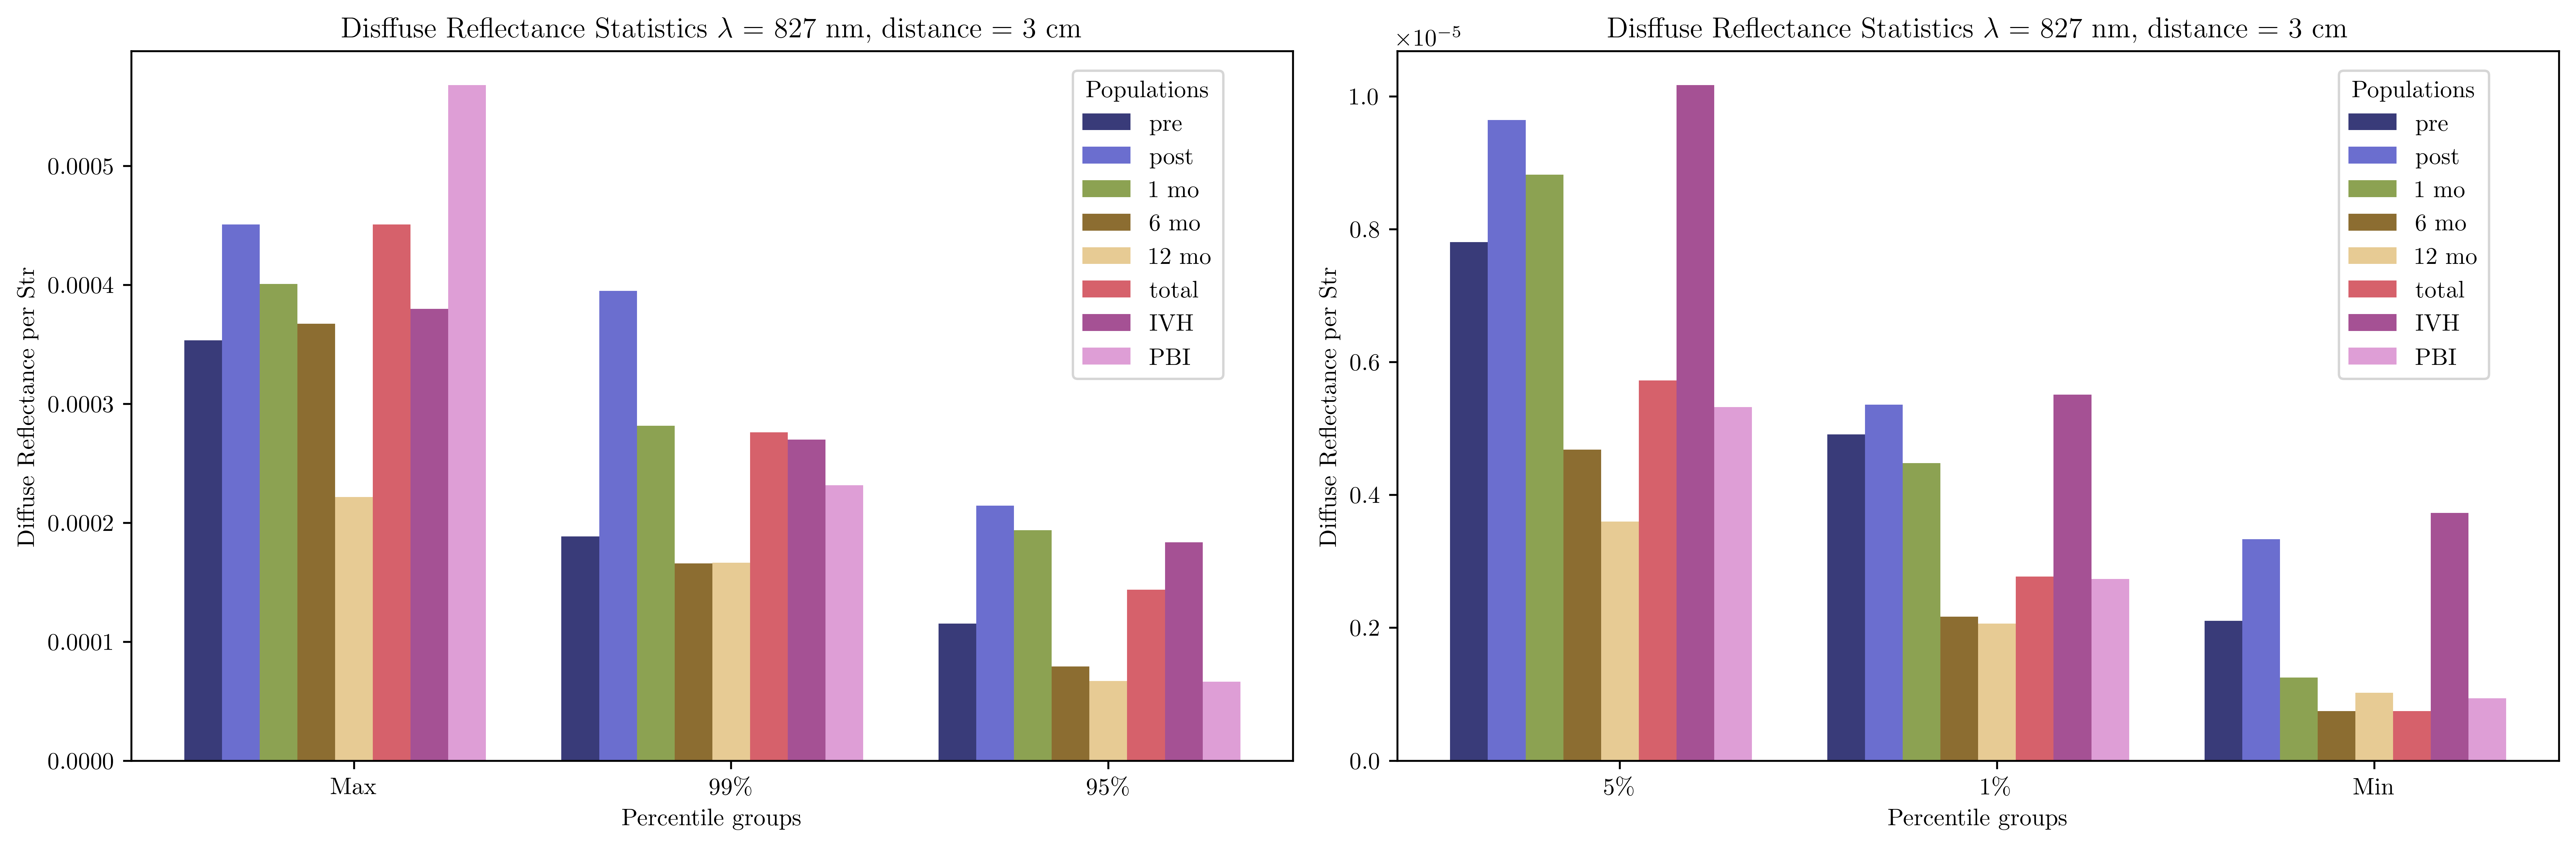

In [24]:

for wlen in cchu_wavelengths: 
    fig_cols = 2
    fig, axs = plt.subplots(1, fig_cols, figsize=(15, 5), dpi=500)
    axs = axs.flatten()


    indices_categories = [['Max','99%', '95%'],['5%','1%', 'Min']]

    text = f"min: {stat_array[0]}\nmax: {stat_array[1]}\n1\%: {stat_array[2]}\n5\%: {stat_array[3]}\n95\%: {stat_array[4]}\n99\%: {stat_array[5]}"

    indices_categories_p = [['Max','99\%', '95\%'],['5\%','1\%', 'Min']]

    width = 0.15  # width of the bars
    gap = 2  # gap between groups
    colormap = plt.cm.tab20b

    for c in range(0,fig_cols): 
        data_frame_p = stats_df_dict_by_w_v[wlen].loc[indices_categories[c]]
        groups = len(data_frame_p.columns)
        indices = np.arange(len(data_frame_p.index)) * (width * (groups + gap))
        for i, (column, color) in enumerate(zip(data_frame_p.columns, colormap(np.linspace(0, 1, len(data_frame_p.columns))))):
            axs[c].bar(indices + i * width, data_frame_p[column], width=width, label=column, color=color)

        axs[c].legend(title='Populations', bbox_to_anchor=(0.80, 0.99), loc='upper left')
        axs[c].set_xlabel('Percentile groups')
        axs[c].set_ylabel('Diffuse Reflectance per Str')
        axs[c].set_title(fr"Disffuse Reflectance Statistics $\lambda$ =  {wlen} nm, distance = {distance[0]} cm")
        axs[c].set_xticks(indices + (width * groups) / 2)
        axs[c].set_xticklabels(indices_categories_p[c])
 

    plt.tight_layout()
    plt.savefig('Populations_DR_Histogram_lambda_'+str(wlen)+'d_'+str(distance)+'.jpg', dpi=500)

# Dynamic Ranges

In [27]:
#Dynamic Ranges
wl_dynamic_range_dict = {}
indices_dynamic = ['Max / Min', '99% / 1%', '95% / 5%']
for wl in cchu_wavelengths:
    population_matrix_values = np.empty((0,3))
    for population in list(stats_df_dict_by_w_v[wl].columns): 
        dynamic_r_1 = stats_df_dict_by_w_v[wl][population].to_numpy()[0]/stats_df_dict_by_w_v[wl][population].to_numpy()[5]
        dynamic_r_2 = stats_df_dict_by_w_v[wl][population].to_numpy()[1]/stats_df_dict_by_w_v[wl][population].to_numpy()[4]
        dynamic_r_3 = stats_df_dict_by_w_v[wl][population].to_numpy()[2]/stats_df_dict_by_w_v[wl][population].to_numpy()[3]
        population_matrix_values = np.append(population_matrix_values, [np.asarray([dynamic_r_1,dynamic_r_2,dynamic_r_3])], axis=0)
    np.transpose(population_matrix_values)
    wl_dynamic_range_dict[wl] = pd.DataFrame(np.transpose(population_matrix_values), columns = list(stats_df_dict_by_w_v[wl].columns), index = indices_dynamic)




In [31]:
csv_file_paths = ['Stats_Populations.csv','Dynamic_range.csv']
data_frames_array = [stats_df_dict_by_w_s,wl_dynamic_range_dict]

In [36]:
# Write csv's by value

csv_file_paths = ['Stats_Populations.csv','Dynamic_range.csv']
#Change v to s in stats_df_dict_by_w_v to have string
data_frames_array = [stats_df_dict_by_w_v,wl_dynamic_range_dict]

for path,df_ in zip(csv_file_paths, data_frames_array):
        for wlen  in cchu_wavelengths:
                csv_file = wlen+path
                df_[wlen].to_csv(csv_file, index=False)


In [121]:
#Writing the excel files
excel_file_paths = ['Stats_Populations.xlsx','Dynamic_range.xlsx']
data_frames_array = [stats_df_dict_by_w_s,wl_dynamic_range_dict]

for path,df_ in zip(excel_file_paths, data_frames_array):
    with pd.ExcelWriter(path, engine='xlsxwriter') as writer:
        for i,(wlen)  in enumerate(cchu_wavelengths):
            #Different sheet for each wavelength
            df_[wlen].to_excel(writer, sheet_name=str(wlen))


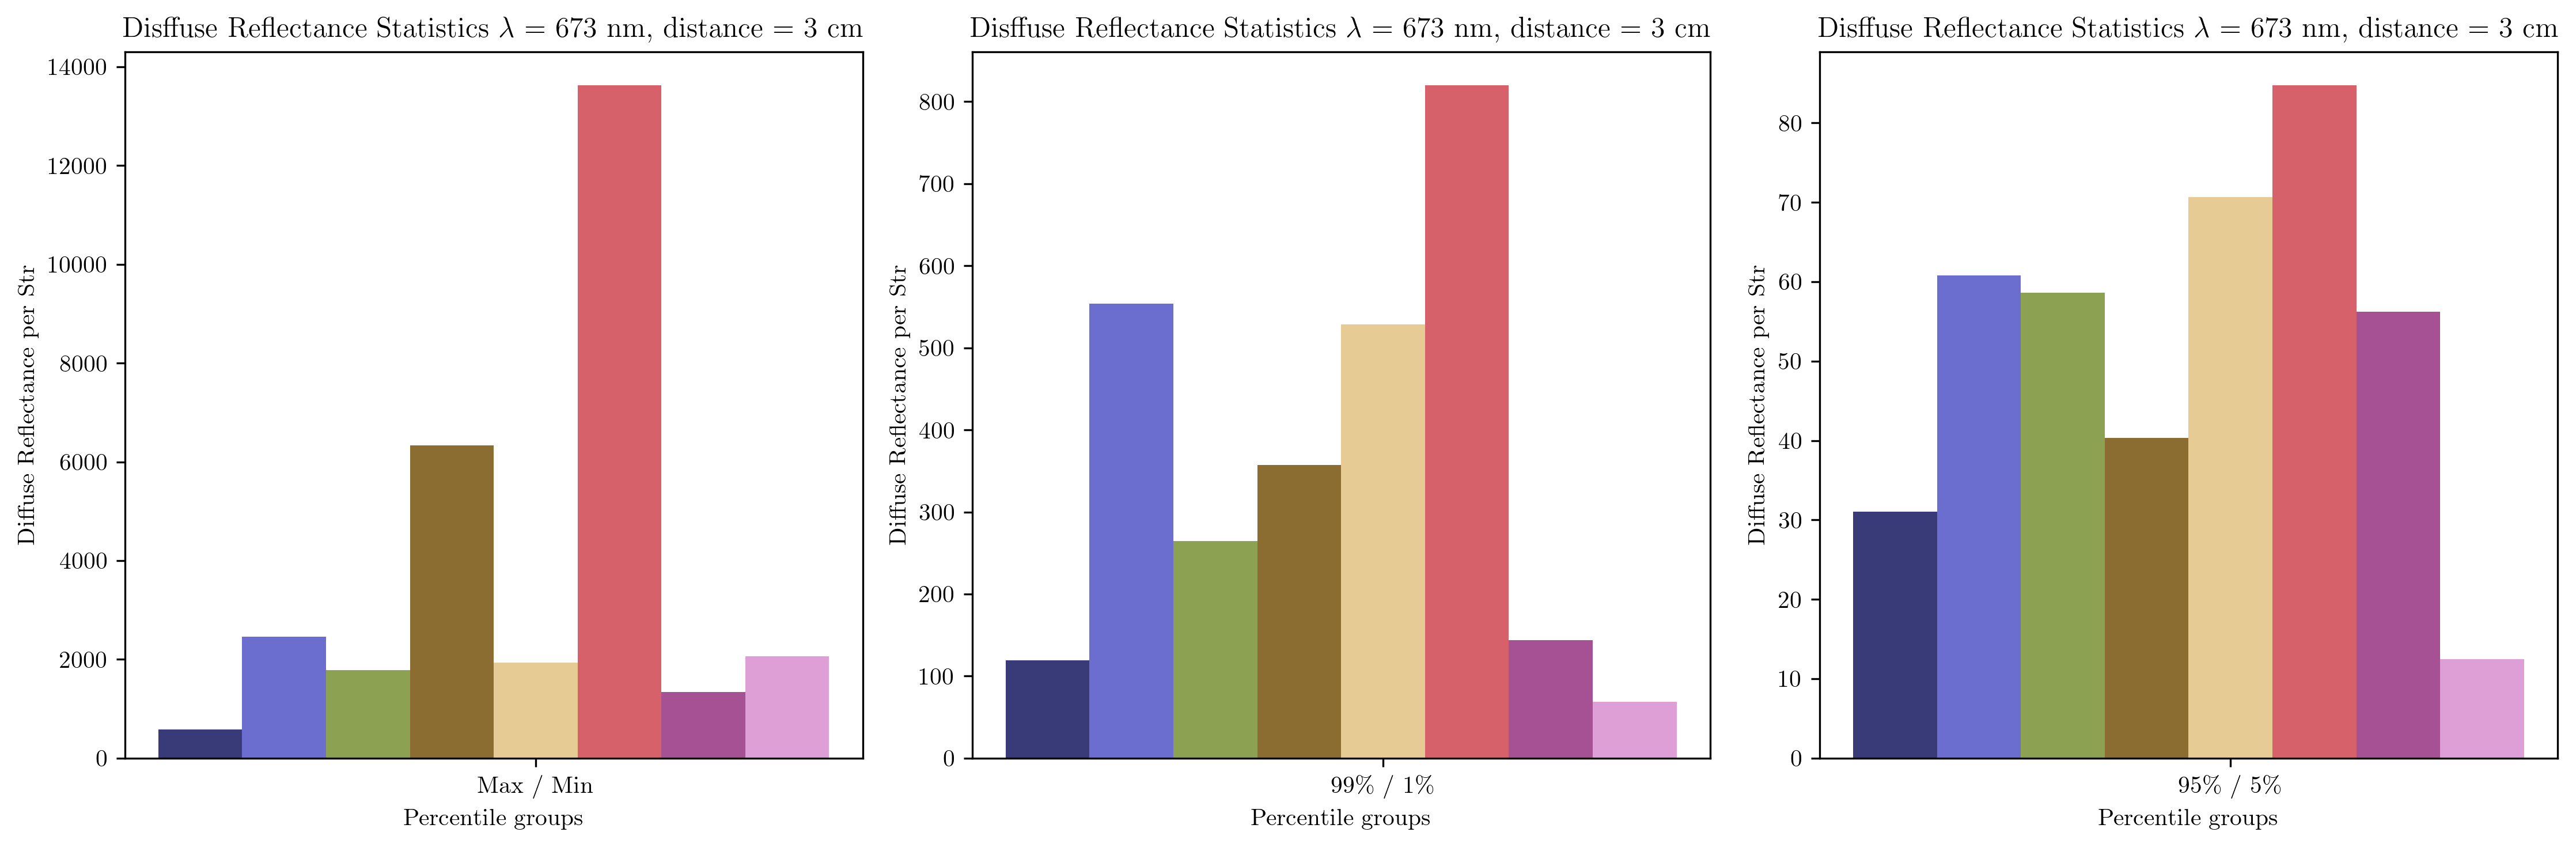

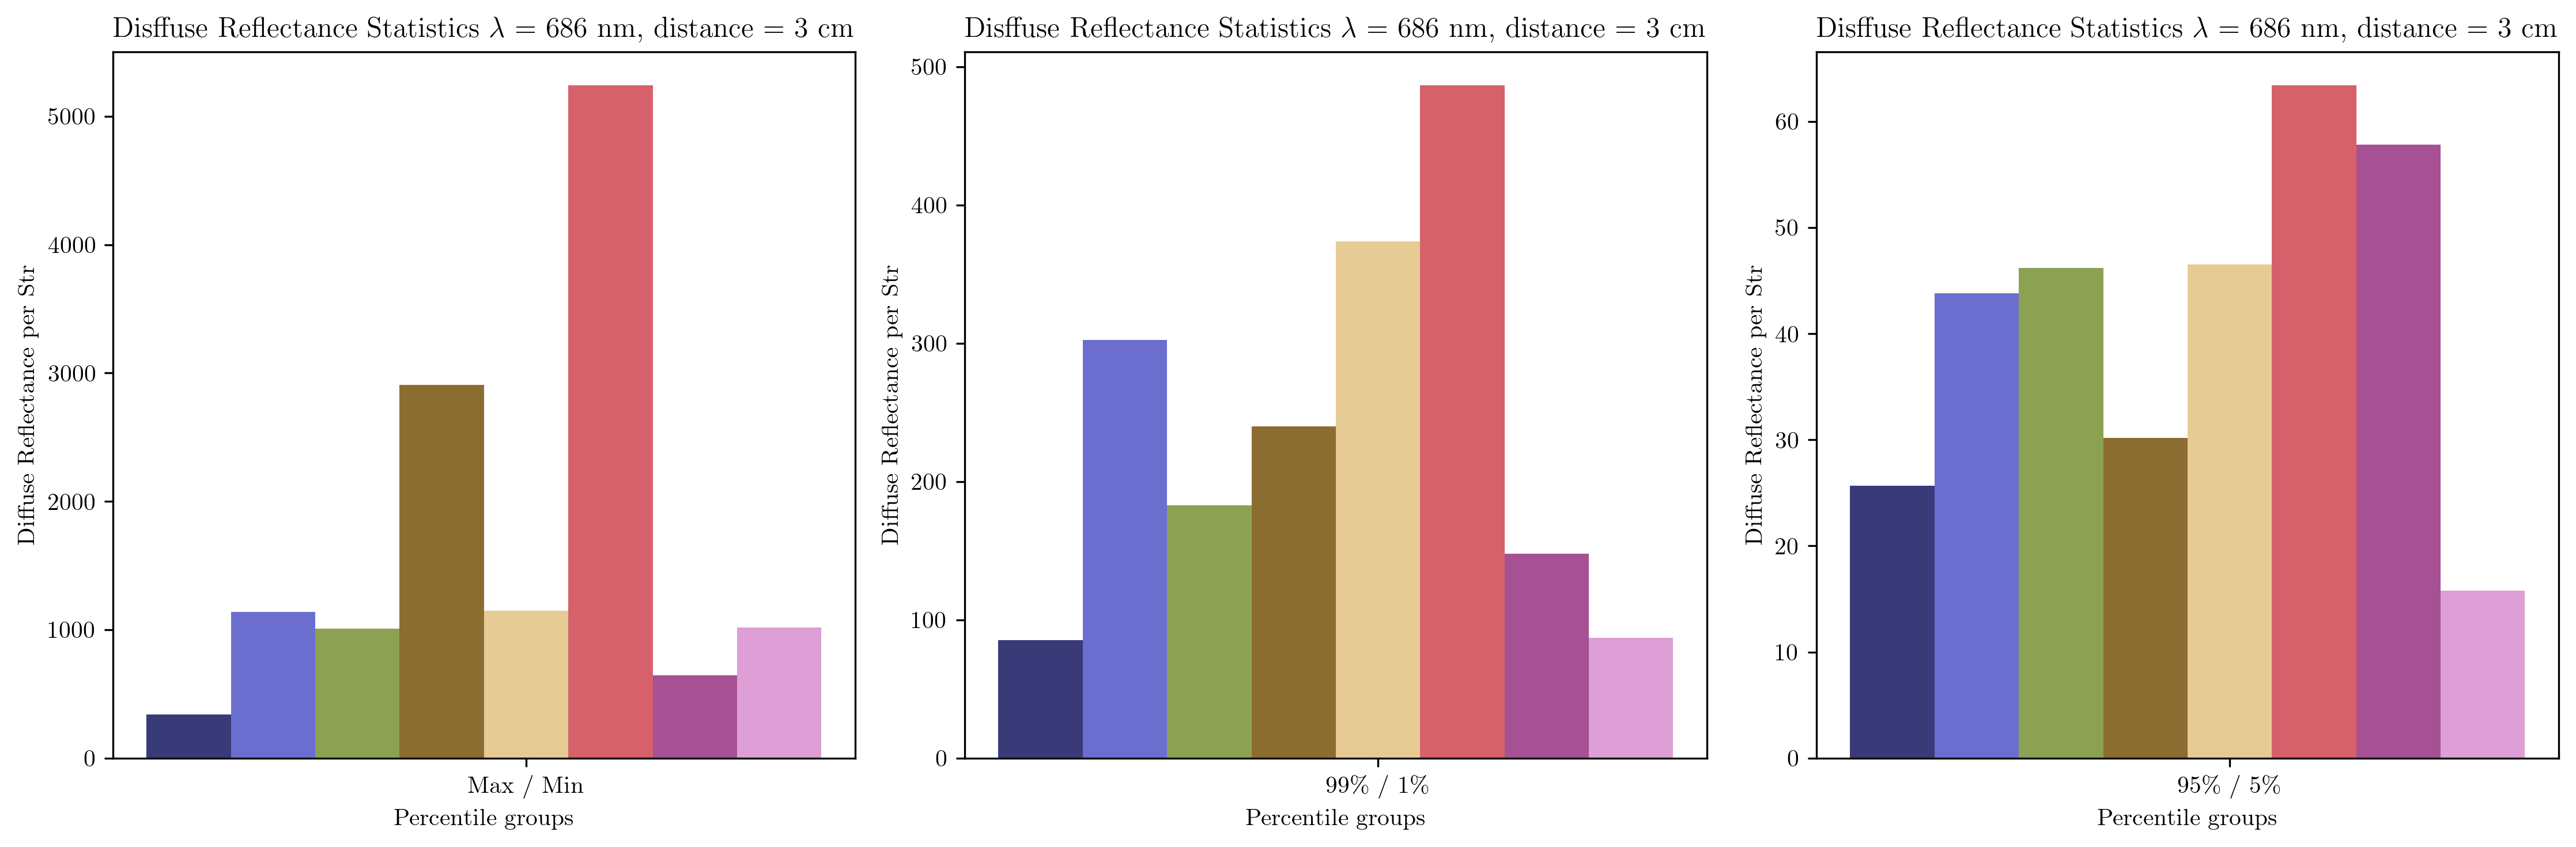

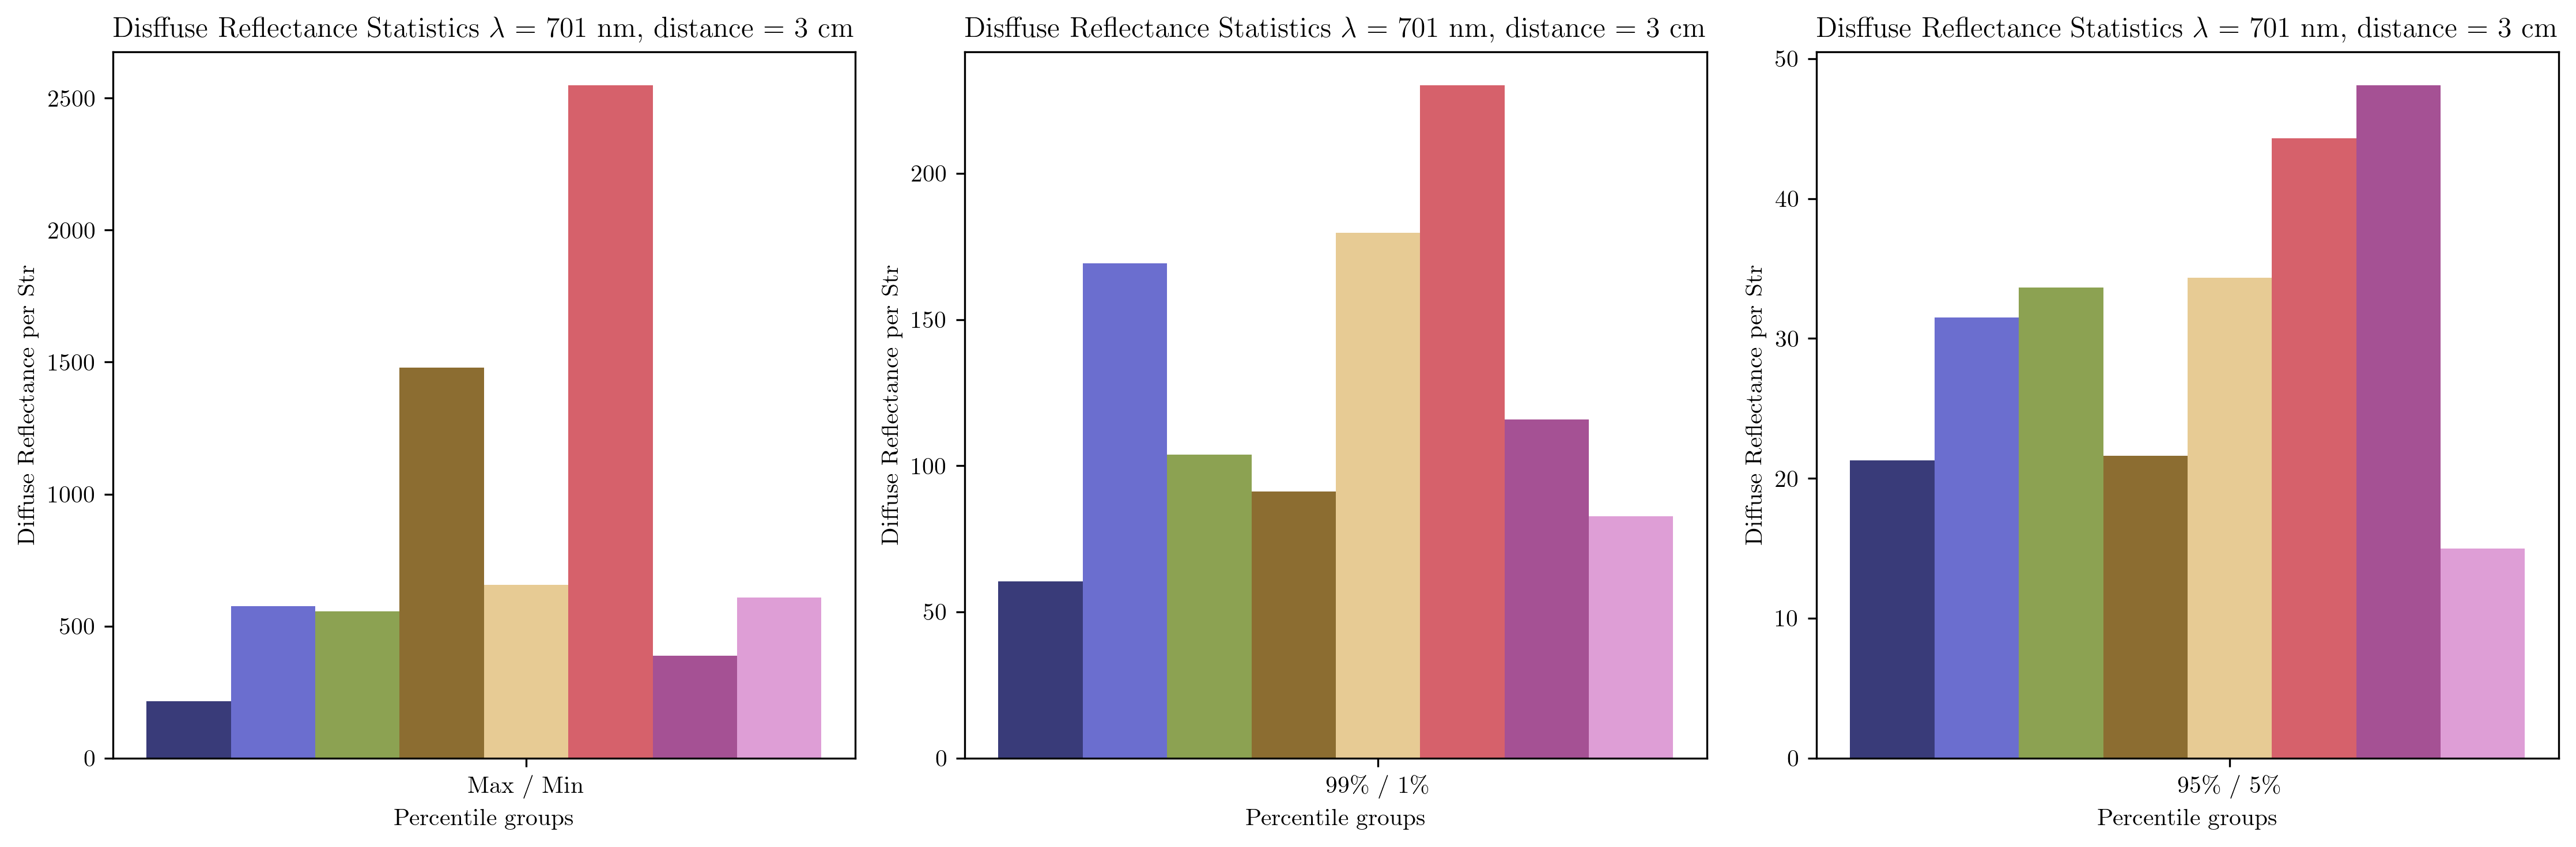

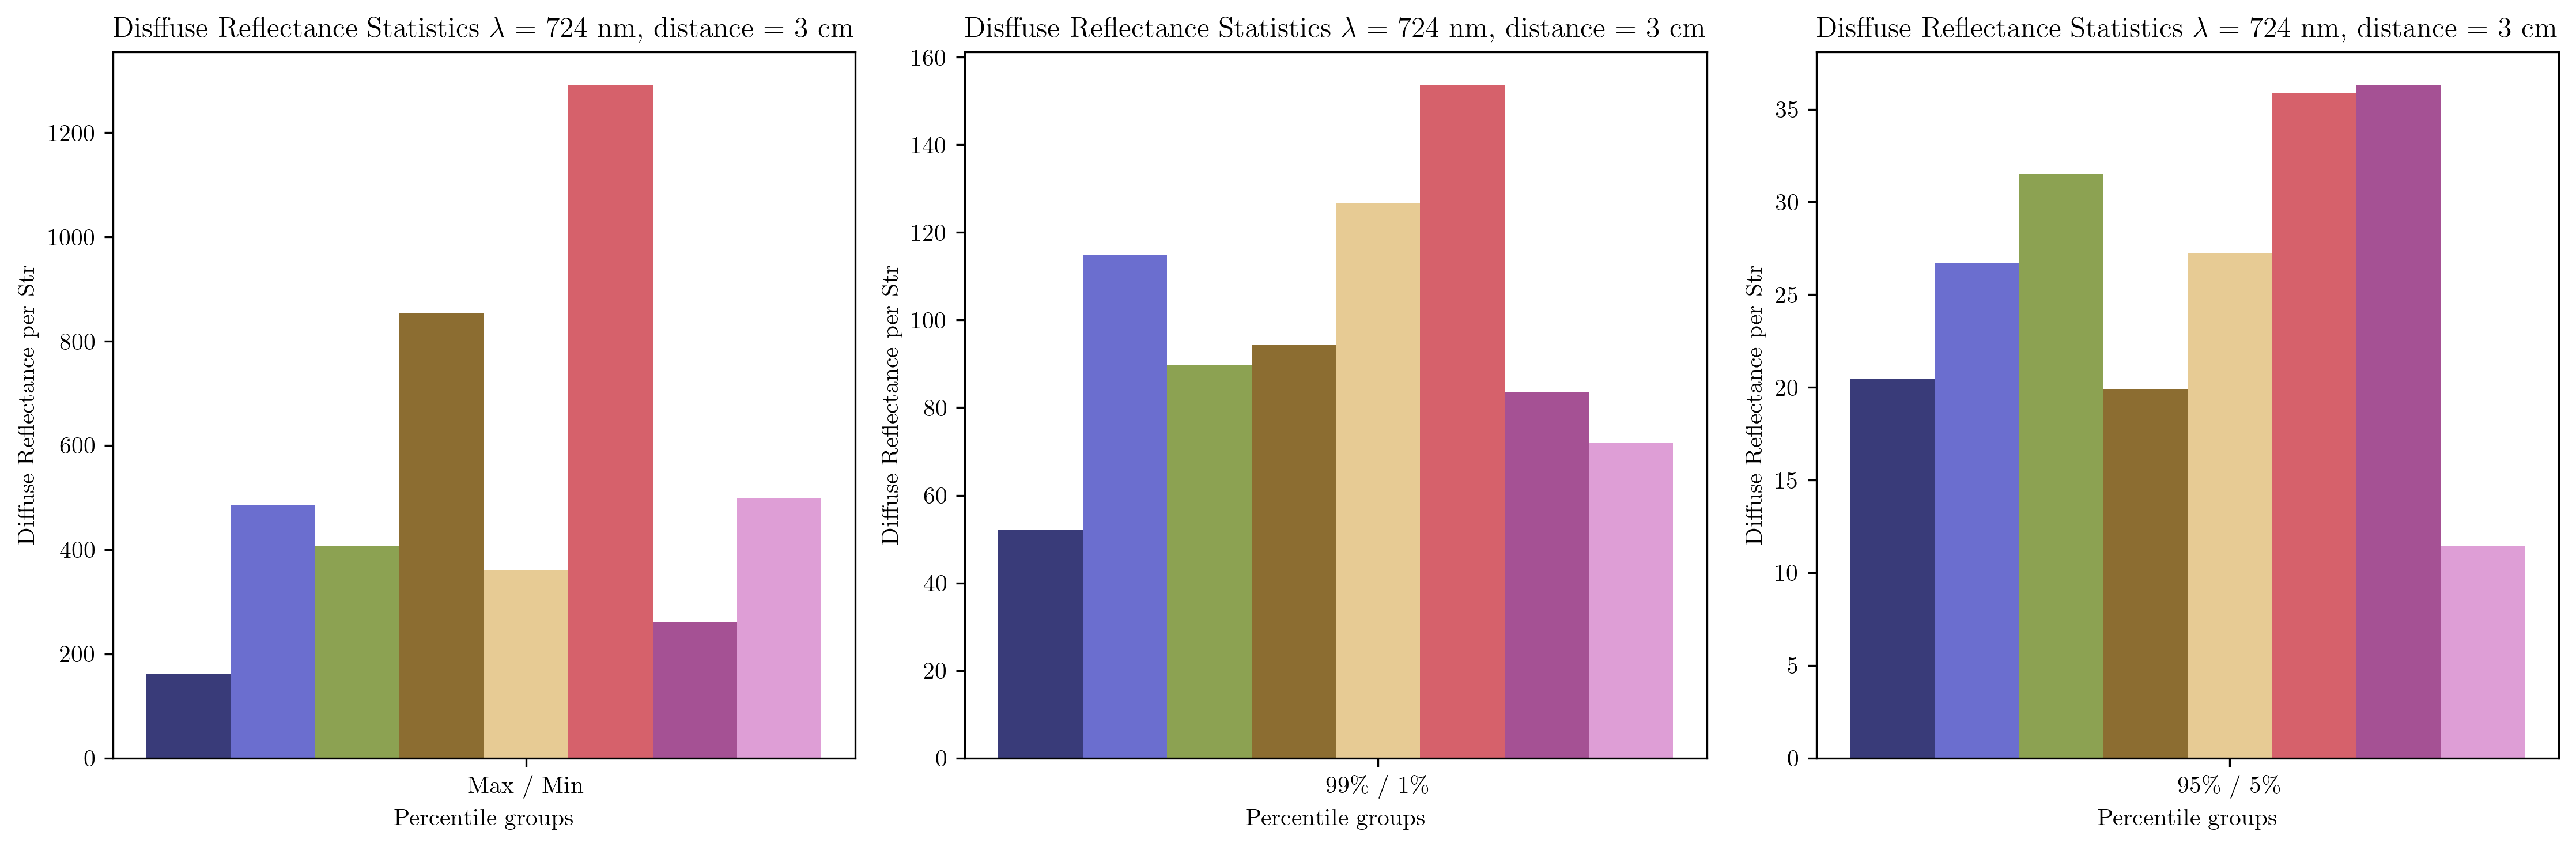

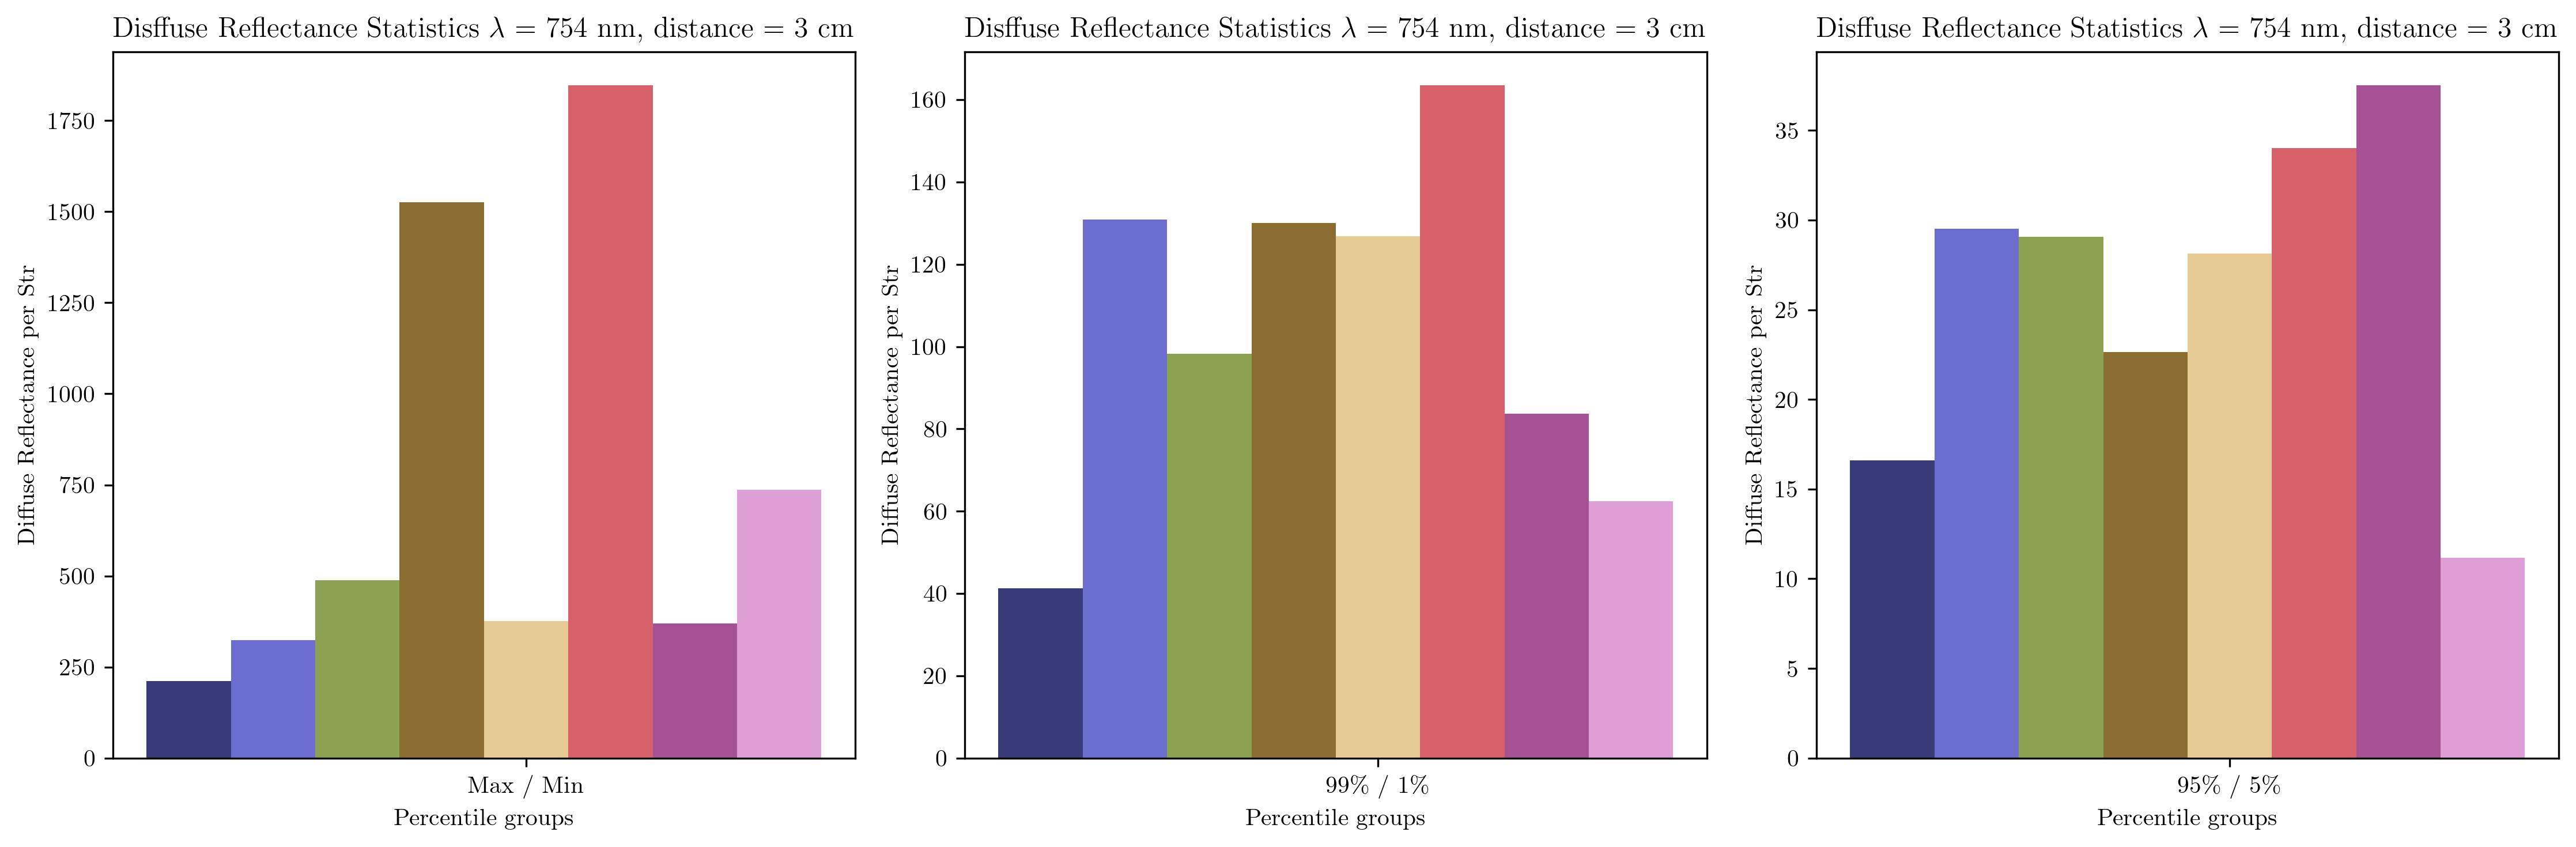

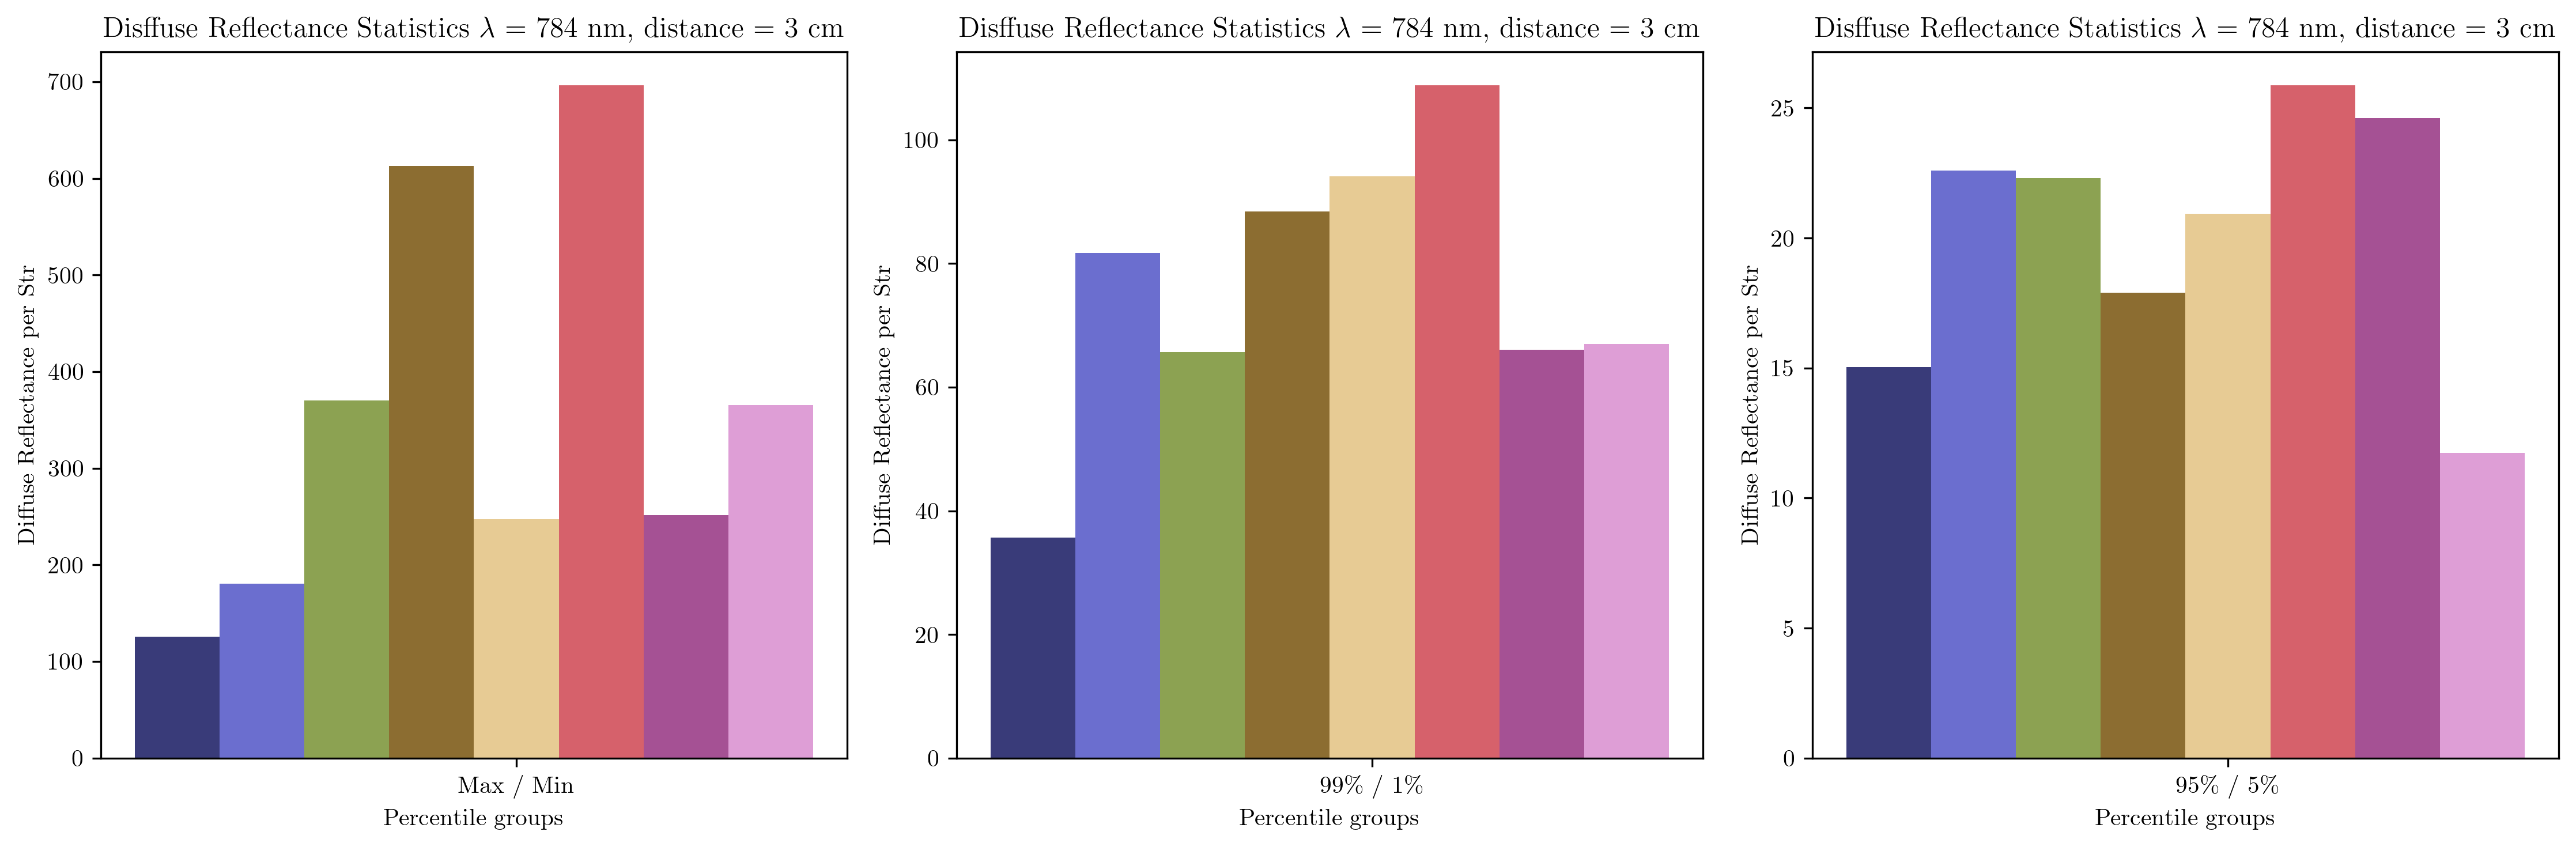

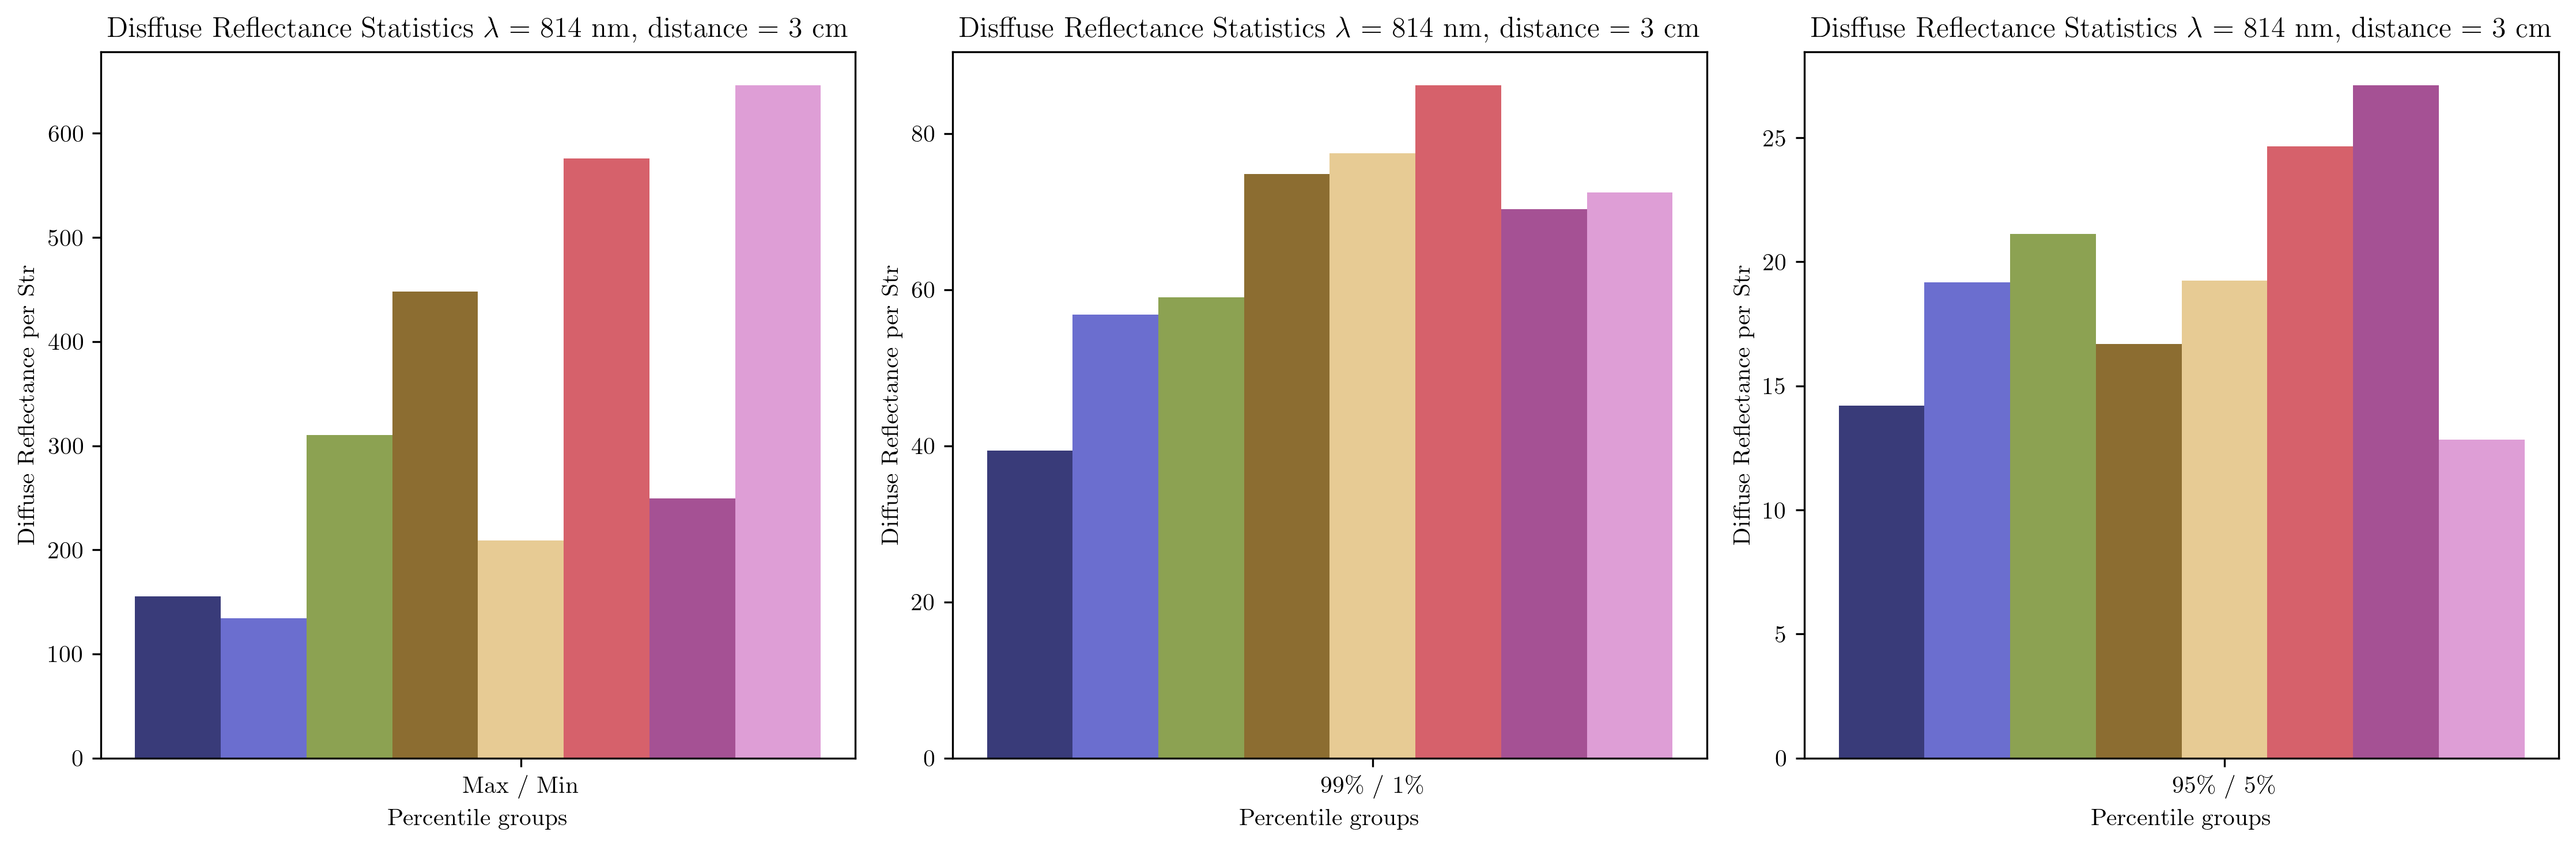

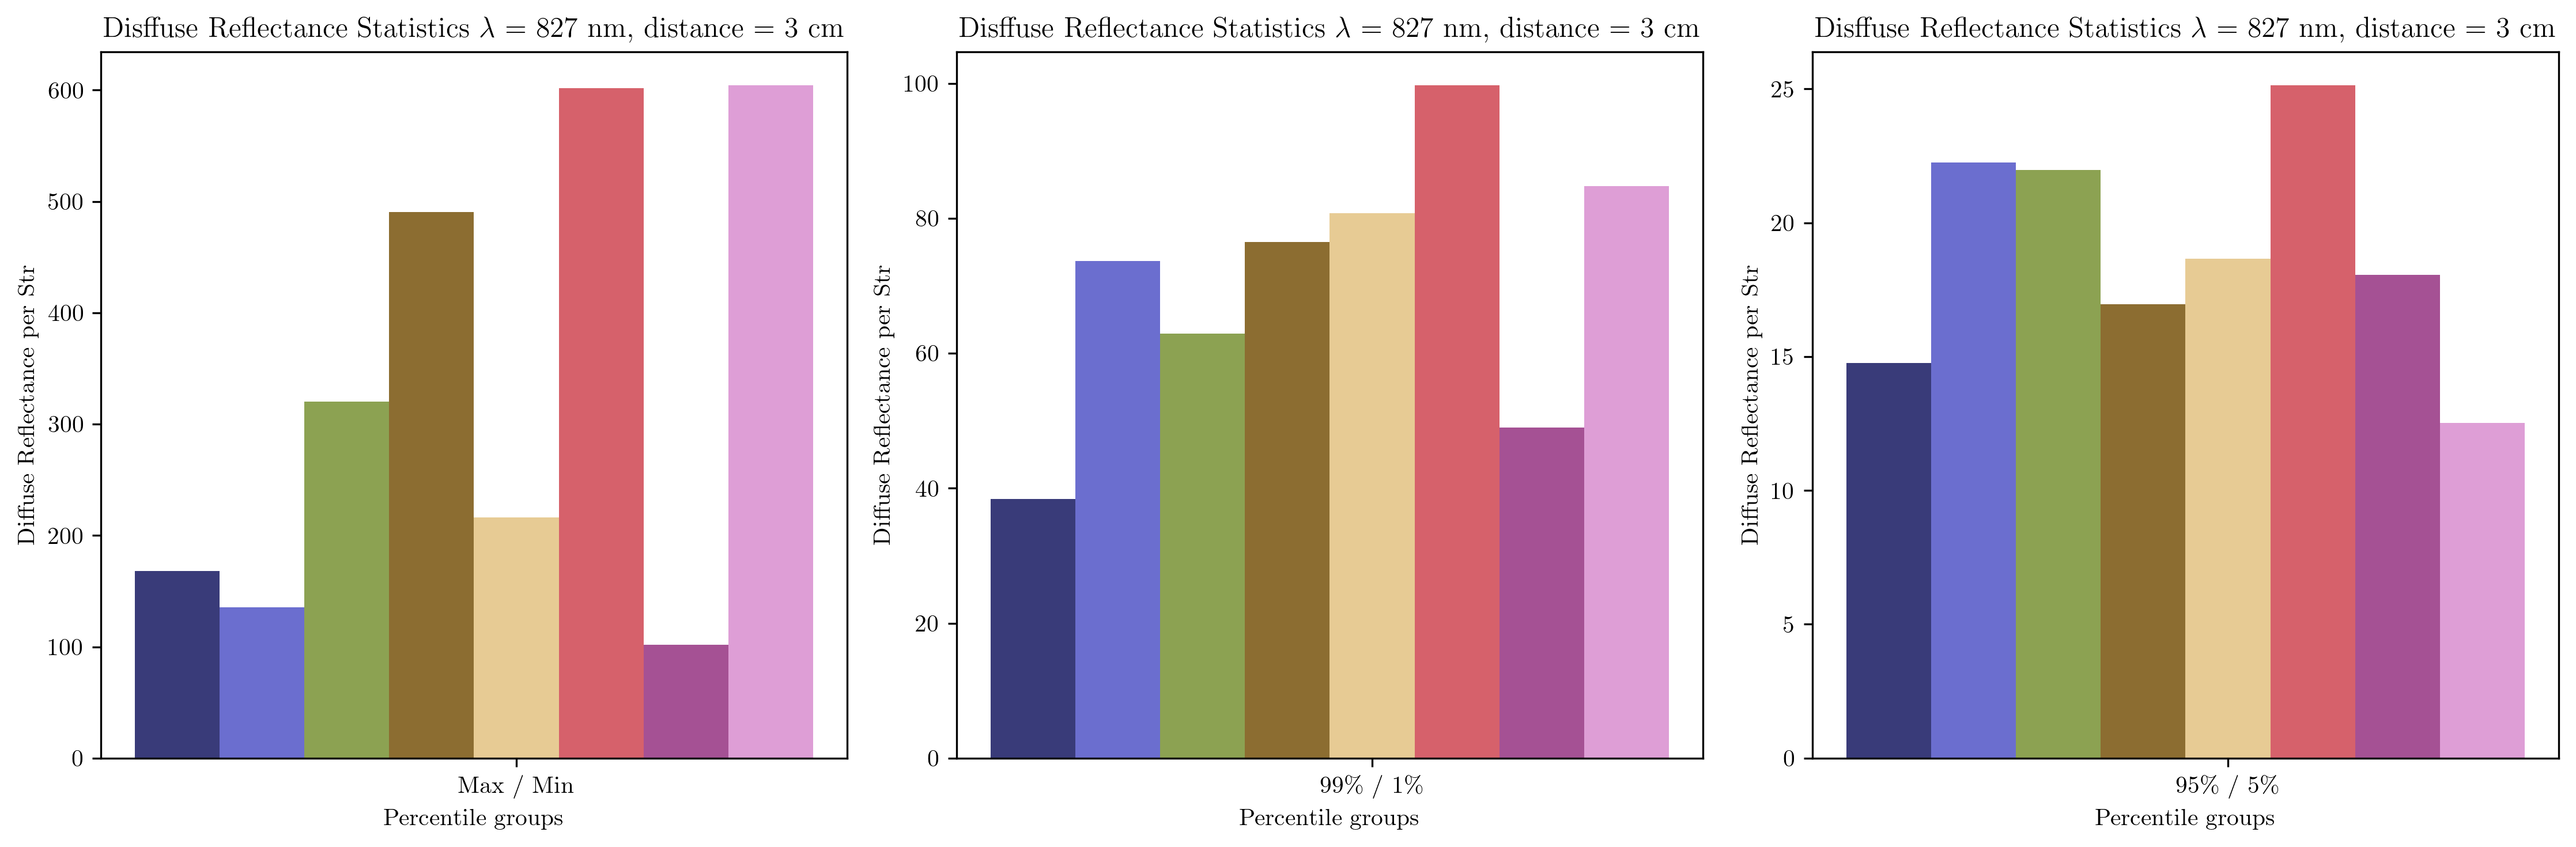

In [120]:

for wlen in cchu_wavelengths: 
    fig_cols = 3
    fig, ax_d = plt.subplots(1, fig_cols, figsize=(15, 5), dpi=300)
    ax_d = ax_d.flatten()

    dynamic_indices_cat = [['Max / Min'], ['99% / 1%'],['95% / 5%']]; dynamic_labels = [['Max / Min'], ['99\% / 1\%'],['95\% / 5\%']]


    text = f"min: {stat_array[0]}\nmax: {stat_array[1]}\n1\%: {stat_array[2]}\n5\%: {stat_array[3]}\n95\%: {stat_array[4]}\n99\%: {stat_array[5]}"


    width = 0.15  # width of the bars
    gap = 2  # gap between groups
    colormap = plt.cm.tab20b


    for c in range(0,fig_cols):
        
        data_frame_p = wl_dynamic_range_dict[wlen].loc[dynamic_indices_cat[c]]
        groups = len(data_frame_p.columns)
        indices = np.arange(len(data_frame_p.index)) * (width * (groups + gap))
        for i, (column, color) in enumerate(zip(data_frame_p.columns, colormap(np.linspace(0, 1, len(data_frame_p.columns))))):
            ax_d[c].bar(indices + i * width, data_frame_p[column], width=width, label=column, color=color)

        #ax_d[c].legend(title='Populations', bbox_to_anchor=(0.85, 0.98), loc='upper left')
        ax_d[c].set_xlabel('Percentile groups')
        ax_d[c].set_ylabel('Diffuse Reflectance per Str')
        ax_d[c].set_title(fr"Disffuse Reflectance Statistics $\lambda$ =  {wlen} nm, distance = {distance[0]} cm")
        ax_d[c].set_xticks(indices + (width * groups) / 2)
        ax_d[c].set_xticklabels(dynamic_labels[c])


    plt.tight_layout()
    plt.savefig('Populations_DynamicRange_Histogram_lambda_'+str(wlen)+'d_'+str(distance)+'.jpg', dpi=500)

In [ ]:
# 1.  Histogram how many Neutral Filters were used, I'll be looking at the cal block
#  - Neutral Density Filters are not well documented 
#  - Information might not have entered properly and if more than one sesion was held only the first session was recorded. 

# 2. 2D Histogram Neutral Density Filter vs Diffuse Reflectance 